In [1]:
#loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#loading data
DATA_PATH = 'cellular_dataframe.parquet'
df = pd.read_parquet(DATA_PATH)

print(f"Dataset shape: {df.shape[0]:,} rows x {df.shape[1]} columns")

    

Dataset shape: 207,434 rows x 159 columns


In [3]:
df.reset_index(drop=False, inplace=True)

In [4]:
df.describe(include='all')

,timestamp,device,ping_ms,datarate,jitter,ts_gps,Latitude,Longitude,Altitude,speed_kmh,...,SCell_MNC_Digit,SCell_MNC,SCell_Allowed_Access,SCell_freq_MHz,scenario,drive_mode,target_datarate,direction,measured_qos,operator
count,207434,207434,147471.000000,1.895960e+05,1.895960e+05,204942,204942.000000,204942.000000,204851.000000,204942.000000,...,20882.0,20882.000000,20882.000000,32634.000000,207434,207434,2.074340e+05,207434,207434,207434.000000
unique,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,3,NaN,2,2,NaN
top,NaN,pc3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,A3D,platoon,NaN,uplink,datarate,NaN
freq,NaN,60422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,65802,160754,NaN,106984,129586,NaN
mean,2021-06-23 09:41:33.851697+02:00,NaN,470.438923,2.122702e+07,4.121009e+03,2021-06-23 09:46:54.770476,52.505390,13.324697,37.390329,18.219633,...,2.0,1.346183,0.028733,2533.033033,NaN,NaN,1.342385e+08,NaN,NaN,1.500786
min,2021-06-22 09:49:00+02:00,NaN,15.900000,8.510000e+02,1.600000e-05,2021-06-22 09:49:54,52.469215,13.236470,-5.300000,0.000000,...,2.0,1.000000,0.000000,1800.000000,NaN,NaN,4.000000e+05,NaN,NaN,1.000000
25%,2021-06-22 16:03:23.250000+02:00,NaN,33.900000,4.030000e+05,3.370000e-04,2021-06-22 16:05:53,52.499553,13.304537,31.600000,0.000000,...,2.0,1.000000,0.000000,2600.000000,NaN,NaN,4.000000e+05,NaN,NaN,1.000000
50%,2021-06-23 11:16:09+02:00,NaN,54.700000,1.310000e+07,9.520000e-04,2021-06-23 11:17:57,52.506543,13.322392,36.100000,15.742000,...,2.0,1.000000,0.000000,2600.000000,NaN,NaN,7.500000e+07,NaN,NaN,2.000000
75%,2021-06-23 16:45:25+02:00,NaN,530.000000,3.080000e+07,3.085000e-03,2021-06-23 16:46:41,52.512673,13.344655,41.400000,32.595200,...,2.0,2.000000,0.000000,2600.000000,NaN,NaN,3.500000e+08,NaN,NaN,2.000000
max,2021-06-24 18:59:59+02:00,NaN,110676.000000,2.710000e+08,1.014163e+08,2021-06-24 18:59:59,52.517725,13.377518,129.800000,99.082000,...,2.0,2.000000,2.000000,2600.000000,NaN,NaN,3.500000e+08,NaN,NaN,2.000000


In [5]:
# Display column names
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

 1. timestamp
 2. device
 3. ping_ms
 4. datarate
 5. jitter
 6. ts_gps
 7. Latitude
 8. Longitude
 9. Altitude
10. speed_kmh
11. COG
12. precipIntensity
13. precipProbability
14. temperature
15. apparentTemperature
16. dewPoint
17. humidity
18. pressure
19. windSpeed
20. cloudCover
21. uvIndex
22. visibility
23. Traffic Jam Factor
24. Traffic Street Name
25. Traffic Distance
26. Pos in Ref Round
27. measurement
28. area
29. PCell_RSRP_1
30. PCell_RSRP_2
31. PCell_RSRP_max
32. PCell_RSRQ_1
33. PCell_RSRQ_2
34. PCell_RSRQ_max
35. PCell_RSSI_1
36. PCell_RSSI_2
37. PCell_RSSI_max
38. PCell_SNR_1
39. PCell_SNR_2
40. PCell_E-ARFCN
41. PCell_Downlink_Num_RBs
42. PCell_Downlink_TB_Size
43. PCell_Downlink_RBs_MCS_0
44. PCell_Downlink_RBs_MCS_1
45. PCell_Downlink_RBs_MCS_2
46. PCell_Downlink_RBs_MCS_3
47. PCell_Downlink_RBs_MCS_4
48. PCell_Downlink_RBs_MCS_5
49. PCell_Downlink_RBs_MCS_6
50. PCell_Downlink_RBs_MCS_7
51. PCell_Downlink_RBs_MCS_8
52. PCell_Downlink_RBs_MCS_9
53. PCell_Downlink_RBs

In [6]:

print(f"\nDATA TYPES:")
print(df.dtypes.value_counts())

# Identify column types
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()





DATA TYPES:
float64                          144
object                            11
int64                              2
datetime64[us, Europe/Berlin]      1
datetime64[us]                     1
int32                              1
Name: count, dtype: int64


##  MISSING DATA ANALYSIS

In [7]:

# Calculate overall missingness
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
complete_cells = total_cells - missing_cells

print(f"\nMISSINGNESS:")
print(f"Total cells:    {total_cells:,}")
print(f"Missing cells:  {missing_cells:,} ({missing_cells/total_cells*100:.2f}%)")
print(f"Complete cells: {complete_cells:,} ({complete_cells/total_cells*100:.2f}%)")





MISSINGNESS:
Total cells:    33,189,440
Missing cells:  17,268,906 (52.03%)
Complete cells: 15,920,534 (47.97%)


In [8]:

# Column-level analysis
cols_complete = (df.isnull().sum() == 0).sum()
cols_with_missing = (df.isnull().sum() > 0).sum()
cols_mostly_missing = (df.isnull().sum() > len(df) * 0.5).sum()

print(f"\n COLUMN-LEVEL ANALYSIS:")
print(f"  • Columns with NO missing:   {cols_complete:,}")
print(f"  • Columns with SOME missing: {cols_with_missing:,}")
print(f"  • Columns with >50% missing: {cols_mostly_missing:,}")


 COLUMN-LEVEL ANALYSIS:
  • Columns with NO missing:   9
  • Columns with SOME missing: 151
  • Columns with >50% missing: 92


In [9]:


#MISSING DATA BY COLUMN


# Calculate missing per column
missing_per_col = pd.DataFrame({
    'column': df.columns,
    'missing_count': df.isnull().sum().values,
    'missing_pct': (df.isnull().sum() / len(df) * 100).values,
    'dtype': df.dtypes.values
}).sort_values('missing_pct', ascending=False)

# Categorize by missingness level
print(f"\n COLUMNS BY MISSINGNESS LEVEL:")

categories = [
    ("Complete (0%)", 0, 0),
    ("Low (0-10%)", 0.01, 10),
    ("Medium (10-50%)", 10.01, 50),
    ("Moderate (50-80%)", 50.01, 80),
    ("High (80-95%)", 80.01, 95),
    ("Almost Complete (95-100%)", 95.01, 99.99),
    ("Complete Missing (100%)", 100, 100)
]

for cat_name, lower, upper in categories:
    if upper == 0:
        count = (missing_per_col['missing_pct'] == 0).sum()
    elif lower == 100:
        count = (missing_per_col['missing_pct'] == 100).sum()
    else:
        count = ((missing_per_col['missing_pct'] >= lower) & 
                 (missing_per_col['missing_pct'] <= upper)).sum()
    print(f"{cat_name:30s}: {count:3d} columns")



 COLUMNS BY MISSINGNESS LEVEL:
Complete (0%)                 :   9 columns
Low (0-10%)                   :  55 columns
Medium (10-50%)               :   4 columns
Moderate (50-80%)             :  19 columns
High (80-95%)                 :  48 columns
Almost Complete (95-100%)     :  22 columns
Complete Missing (100%)       :   3 columns


In [10]:
# most missing columns
print(f"\nCOLUMNS WITH MOST MISSING DATA:")
print(f"{'Column':<50s} {'Missing Count':>15s} {'Missing %':>12s}")


for idx, row in missing_per_col.head(20).iterrows():
    print(f"{row['column']:<50s} {row['missing_count']:>15,.0f} {row['missing_pct']:>11.2f}%")


COLUMNS WITH MOST MISSING DATA:
Column                                               Missing Count    Missing %
SCell_Uplink_Tx_Power_(dBm)                                207,434      100.00%
SCell_Uplink_Num_RBs                                       207,434      100.00%
SCell_Uplink_TB_Size                                       207,434      100.00%
SCell_Downlink_RBs_MCS_10                                  207,365       99.97%
SCell_Downlink_RBs_MCS_17                                  207,361       99.96%
SCell_Downlink_RBs_MCS_1                                   206,770       99.68%
SCell_Downlink_RBs_MCS_2                                   206,556       99.58%
SCell_Downlink_RBs_MCS_0                                   206,283       99.45%
SCell_Downlink_RBs_MCS_3                                   206,164       99.39%
SCell_Downlink_RBs_MCS_4                                   205,692       99.16%
SCell_Downlink_RBs_MCS_5                                   205,082       98.87%
SCell_D

In [11]:
#
high_missing = missing_per_col[ (missing_per_col['missing_pct'] > 80.01) & (missing_per_col['missing_pct'] < 95.01)]
print(f"\n(80-95% missing): {len(high_missing)}")

for idx, row in high_missing.iterrows():
    print(f"{row['column']:<50s} {row['missing_count']:>15,.0f} {row['missing_pct']:>11.2f}%")


(80-95% missing): 48
SCell_Downlink_RBs_MCS_13                                  196,219       94.59%
SCell_Downlink_RBs_MCS_21                                  195,642       94.32%
SCell_Downlink_RBs_MCS_20                                  194,766       93.89%
SCell_Downlink_RBs_MCS_14                                  193,929       93.49%
SCell_Downlink_RBs_MCS_19                                  193,610       93.34%
SCell_Downlink_RBs_MCS_18                                  192,780       92.94%
SCell_Downlink_RBs_MCS_15                                  192,461       92.78%
SCell_Downlink_RBs_MCS_16                                  191,795       92.46%
PCell_Downlink_RBs_MCS_10                                  191,659       92.40%
SCell_Downlink_RBs_MCS_30                                  190,731       91.95%
SCell_Downlink_RBs_MCS_31                                  187,848       90.56%
SCell_Downlink_bandwidth_MHz                               186,552       89.93%
SCell_Uplink_frequ

In [12]:
# Show complete columns
complete_cols = missing_per_col[missing_per_col['missing_pct'] == 0]
print(f"\n COMPLETE COLUMNS (0% missing): {len(complete_cols)}")

for idx, row in complete_cols.iterrows():
    print(f"  • {row['column']}")


 COMPLETE COLUMNS (0% missing): 9
  • measured_qos
  • direction
  • drive_mode
  • target_datarate
  • timestamp
  • scenario
  • device
  • measurement
  • operator


In [13]:

# Show completely missing columns
completely_missing = missing_per_col[missing_per_col['missing_pct'] == 100]
if len(completely_missing) > 0:
    print(f"\nCOMPLETELY MISSING (100%): {len(completely_missing)}")
    
    for idx, row in completely_missing.iterrows():
        print(f" {row['column']}")
else:
    print(f"\nNo columns with 100% missing data")


missing_per_col.to_csv('results/missing_per_column.csv', index=False)





COMPLETELY MISSING (100%): 3
 SCell_Uplink_Tx_Power_(dBm)
 SCell_Uplink_Num_RBs
 SCell_Uplink_TB_Size


Dividing the feature for analysis

In [14]:


# Enhanced categorization with data sources
feature_taxonomy = {
    'temporal': {
        'features': []
    },
    'identifiers': {
        'features': []
    },
    'gps': {
        'features': []
    },
    'weather': {
        'features': []
    },
    'traffic': {
        'features': []
    },
    'network_qos': {
        'features': []
    },
    'pcell_signal': {
        'features': []
    },
    'pcell_rrc': {
        'features': []
    },
    'pcell_downlink': {
        'features': []
    },
    'pcell_uplink': {
        'features': []
    },
    'scell_signal': {
        'features': []
    },
    'scell_downlink': {
        'features': []
    },
    'scell_uplink': {
        'features': []
    },
}

# Categorize each column with detailed grouping
for col in df.columns:
    # Temporal
    if col in ['timestamp', 'ts_gps']:
        feature_taxonomy['temporal']['features'].append(col)
    
    # Identifiers
    elif col in ['device', 'measurement', 'operator', 'scenario', 
                 'drive_mode', 'direction', 'measured_qos', 'target_datarate'
                 ]:
        feature_taxonomy['identifiers']['features'].append(col)
    
    # GPS
    elif col in ['Latitude', 'Longitude', 'Altitude', 'speed_kmh', 'COG','Pos in Ref Round','area']:
        feature_taxonomy['gps']['features'].append(col)
    
    # Weather
    elif any(w in col.lower() for w in ['precip', 'temperature', 'dewpoint', 
                                         'humidity', 'pressure', 'wind', 'cloud', 
                                         'uvindex', 'visibility', 'apparent']):
        feature_taxonomy['weather']['features'].append(col)
    
    # Traffic
    elif 'traffic' in col.lower():
        feature_taxonomy['traffic']['features'].append(col)
    
    # Network QoS
    elif col in ['ping_ms', 'datarate', 'jitter']:
        feature_taxonomy['network_qos']['features'].append(col)
    
    # PCell - Signal strength/quality (RSRP, RSRQ, RSSI, SNR)
    elif col.startswith('PCell') and any(s in col for s in ['RSRP', 'RSRQ', 'RSSI', 'SNR']):
        feature_taxonomy['pcell_signal']['features'].append(col)
    
    # PCell - Downlink
    elif col.startswith('PCell') and 'Downlink' in col:
        feature_taxonomy['pcell_downlink']['features'].append(col)
    
    # PCell - Uplink
    elif col.startswith('PCell') and 'Uplink' in col:
        feature_taxonomy['pcell_uplink']['features'].append(col)
    
    # PCell - RRC info (Cell ID, frequency, etc.)
    elif col.startswith('PCell'):
        feature_taxonomy['pcell_rrc']['features'].append(col)
    
    # SCell - Signal strength/quality
    elif col.startswith('SCell') and any(s in col for s in ['RSRP', 'RSRQ', 'RSSI', 'SNR']):
        feature_taxonomy['scell_signal']['features'].append(col)
    
    # SCell - Downlink
    elif col.startswith('SCell') and 'Downlink' in col:
        feature_taxonomy['scell_downlink']['features'].append(col)
    
    # SCell - Uplink
    elif col.startswith('SCell') and 'Uplink' in col:
        feature_taxonomy['scell_uplink']['features'].append(col)

# Display taxonomy with sources
print(f"\nFEATURE CATEGORIES BY DATA SOURCE:")

for category, info in feature_taxonomy.items():
    features = info['features']
    if len(features) > 0:
        avg_missing = df[features].isnull().sum().sum() / (len(df) * len(features)) * 100
        
        print(f"\n{category.upper().replace('_', ' ')} ({len(features)} features)")
        print(f"  Avg Missing: {avg_missing:.2f}%")
        print(f"  Features:")
        
        for feat in features:
            missing_pct = df[feat].isnull().sum() / len(df) * 100
            print(f"    • {feat:50s} {missing_pct:>6.2f}% missing")



FEATURE CATEGORIES BY DATA SOURCE:

TEMPORAL (2 features)
  Avg Missing: 0.60%
  Features:
    • timestamp                                            0.00% missing
    • ts_gps                                               1.20% missing

IDENTIFIERS (8 features)
  Avg Missing: 0.00%
  Features:
    • device                                               0.00% missing
    • measurement                                          0.00% missing
    • scenario                                             0.00% missing
    • drive_mode                                           0.00% missing
    • target_datarate                                      0.00% missing
    • direction                                            0.00% missing
    • measured_qos                                         0.00% missing
    • operator                                             0.00% missing

GPS (7 features)
  Avg Missing: 2.18%
  Features:
    • Latitude                                             1.20% mis

In [15]:

# Summary table
print(f"\n\nSUMMARY TABLE:")
print(f"{'Category':<25s} {'Count':>7s} {'Avg Miss%':>10s}")

for category, info in feature_taxonomy.items():
    features = info['features']
    if len(features) > 0:
        avg_missing = df[features].isnull().sum().sum() / (len(df) * len(features)) * 100
        print(f"{category.replace('_', ' ').title():<25s} {len(features):>7d} {avg_missing:>9.2f}%")





SUMMARY TABLE:
Category                    Count  Avg Miss%
Temporal                        2      0.60%
Identifiers                     8      0.00%
Gps                             7      2.18%
Weather                        11      1.20%
Traffic                         3      1.66%
Network Qos                     3     15.37%
Pcell Signal                   11      4.84%
Pcell Rrc                      10      5.86%
Pcell Downlink                 37     61.79%
Pcell Uplink                    5      6.02%
Scell Signal                   11     84.27%
Scell Downlink                 37     95.16%
Scell Uplink                    5     95.97%


# Analyis different features by Group

In [16]:
#GPS- Not including POS in Ref Round
gps_features = ['Latitude', 'Longitude', 'Altitude', 'speed_kmh', 'COG','Pos in Ref Round','area']



In [17]:
gps_stats = pd.DataFrame({
    'Feature': gps_features,
    'Missing_Count': [df[col].isnull().sum() for col in gps_features],
    'Missing_%': [df[col].isnull().sum()/len(df)*100 for col in gps_features],
    'Present_Count': [df[col].notna().sum() for col in gps_features],
    'Unique_Values': [df[col].nunique() for col in gps_features],
    'Data_Type': [df[col].dtype for col in gps_features]
})

print(f"\n{gps_stats.to_string(index=False)}")




         Feature  Missing_Count  Missing_%  Present_Count  Unique_Values Data_Type
        Latitude           2492   1.201346         204942          17484   float64
       Longitude           2492   1.201346         204942          51140   float64
        Altitude           2583   1.245215         204851            847   float64
       speed_kmh           2492   1.201346         204942            523   float64
             COG           2492   1.201346         204942           3588   float64
Pos in Ref Round          16651   8.027132         190783           2891   float64
            area           2492   1.201346         204942              6    object


In [18]:
# Identify which features have different missing patterns
core_gps = ['Latitude', 'Longitude', 'Altitude', 'speed_kmh', 'COG']
derived_gps = ['Pos in Ref Round', 'area']

core_missing = df[core_gps].isnull().sum().mean()
derived_missing = df[derived_gps].isnull().sum().mean()


print(f"  • Core GPS (5 features):     {core_missing:>7,.0f} avg missing ({core_missing/len(df)*100:.2f}%)")
print(f"  • Derived/Area (2 features): {derived_missing:>7,.0f} avg missing ({derived_missing/len(df)*100:.2f}%)")


  • Core GPS (5 features):       2,510 avg missing (1.21%)
  • Derived/Area (2 features):   9,572 avg missing (4.61%)


In [19]:


# Create missing indicators
core_gps_missing = df[core_gps].isnull().all(axis=1)

# Get the exact rows with GPS missing
gps_missing_rows = df[core_gps_missing].copy()


print(f"Total missing rows: {len(gps_missing_rows):,}")



Total missing rows: 2,492


In [20]:



#GPS missing by date and hour

# By date
print(f"\n GPS MISSING BY DATE:")
print(f"{'Date':<15s} {'Total Rows':>12s} {'GPS Missing':>15s} {'%':>8s}")

df['date'] = pd.to_datetime(df['timestamp']).dt.date

for date in sorted(df['date'].unique()):
    date_mask = df['date'] == date
    total = date_mask.sum()
    gps_miss = core_gps_missing[date_mask].sum()
    pct = gps_miss / total * 100
    print(f"{str(date):<15s} {total:>12,} {gps_miss:>15,} {pct:>7.2f}%")

# By hour
print(f"\n GPS MISSING BY HOUR:")
print(f"{'Hour':<10s} {'Total Rows':>12s} {'GPS Missing':>15s} {'%':>8s}")

df['hour'] = pd.to_datetime(df['timestamp']).dt.hour

for hour in sorted(df['hour'].unique()):
    hour_mask = df['hour'] == hour
    total = hour_mask.sum()
    gps_miss = core_gps_missing[hour_mask].sum()
    pct = gps_miss / total * 100
    print(f"{hour:02d}:00{' ':<5s} {total:>12,} {gps_miss:>15,} {pct:>7.2f}%")



# Statistical test: Is GPS missing rate different across hours?
from scipy.stats import chi2_contingency

hour_contingency = pd.crosstab(df['hour'], core_gps_missing)
chi2_hour, p_hour, _, _ = chi2_contingency(hour_contingency)

print(f"\n Chi-square Test (Hour dependency):")
print(f"  Chi-square: {chi2_hour:.2f}")
print(f"  P-value: {p_hour:.6f}")

if p_hour < 0.05:
    print(f"  GPS missing IS time-dependent (p < 0.05)")
else:
    print(f" GPS missing is NOT time-dependent (p >= 0.05)")



 GPS MISSING BY DATE:
Date              Total Rows     GPS Missing        %
2021-06-22            81,010           1,446    1.78%
2021-06-23            79,744             729    0.91%
2021-06-24            46,680             317    0.68%

 GPS MISSING BY HOUR:
Hour         Total Rows     GPS Missing        %
08:00             1,200             104    8.67%
09:00            22,270             366    1.64%
10:00            31,118              82    0.26%
11:00            30,471             629    2.06%
12:00            11,528              19    0.16%
13:00             2,400             152    6.33%
14:00            19,680             226    1.15%
15:00            27,480             479    1.74%
16:00            33,089             162    0.49%
17:00            19,376             233    1.20%
18:00             8,822              40    0.45%

 Chi-square Test (Hour dependency):
  Chi-square: 1910.01
  P-value: 0.000000
  GPS missing IS time-dependent (p < 0.05)


In [21]:

#GPS missing by device

print(f"\n GPS MISSING BY DEVICE:")
print(f"{'Device':<10s} {'Total Rows':>12s} {'GPS Missing':>15s} {'%':>8s}")

for device in sorted(df['device'].unique()):
    device_mask = df['device'] == device
    total = device_mask.sum()
    gps_miss = core_gps_missing[device_mask].sum()
    pct = gps_miss / total * 100
    print(f"{device:<10s} {total:>12,} {gps_miss:>15,} {pct:>7.2f}%")

# Statistical test: Is GPS missing device-dependent?
device_contingency = pd.crosstab(df['device'], core_gps_missing)
chi2_device, p_device, _, _ = chi2_contingency(device_contingency)

print(f"\n Chi-square Test (Device dependency):")
print(f"  Chi-square: {chi2_device:.2f}")
print(f"  P-value: {p_device:.6f}")

if p_device < 0.05:
    print(f"  GPS missing IS device-dependent (p < 0.05)")
    print(f"     Different vehicles have different GPS failure rates")
else:
    print(f"  GPS missing is NOT device-dependent (p >= 0.05)")
    print(f"     GPS failure rate similar across vehicles")




 GPS MISSING BY DEVICE:
Device       Total Rows     GPS Missing        %
pc1              60,208             689    1.14%
pc2              43,458             579    1.33%
pc3              60,422             699    1.16%
pc4              43,346             525    1.21%

 Chi-square Test (Device dependency):
  Chi-square: 8.97
  P-value: 0.029685
  GPS missing IS device-dependent (p < 0.05)
     Different vehicles have different GPS failure rates


In [22]:


print(f"\n GPS MISSING BY OPERATOR:")
print(f"{'Operator':<10} {'Total Rows':>12} {'GPS Missing':>15} {'%':>8}")

for operator in sorted(df['operator'].unique()):
    op_mask = df['operator'] == operator
    total = op_mask.sum()
    gps_miss = core_gps_missing[op_mask].sum()
    pct = gps_miss / total * 100
    print(f"{operator:<10} {total:>12,} {gps_miss:>15,} {pct:>7.2f}%")





 GPS MISSING BY OPERATOR:
Operator     Total Rows     GPS Missing        %
1               103,554           1,214    1.17%
2               103,880           1,278    1.23%


In [23]:

#What else is missing when GPS is missing?

print(f"\nIn the {core_gps_missing.sum():,} rows with GPS missing:")
print(f"{'Feature':<30s} {'Missing Count':>15s} {'%':>8s}")

features_to_check = {
    'Weather (temperature)': 'temperature',
    'Traffic Jam Factor': 'Traffic Jam Factor',
    'Area': 'area',
    'Ping': 'ping_ms',
    'Datarate': 'datarate',
    'Jitter': 'jitter'
}

for name, col in features_to_check.items():
    if col in df.columns:
        missing_count = df.loc[core_gps_missing, col].isnull().sum()
        pct = missing_count / core_gps_missing.sum() * 100
        print(f"{name:<30s} {missing_count:>15,} {pct:>7.2f}%")






In the 2,492 rows with GPS missing:
Feature                          Missing Count        %
Weather (temperature)                    2,492  100.00%
Traffic Jam Factor                       2,492  100.00%
Area                                     2,492  100.00%
Ping                                     2,256   90.53%
Datarate                                 2,159   86.64%
Jitter                                   2,159   86.64%


In [24]:
idex=df.loc[core_gps_missing]

In [25]:
idex[['Latitude', 'Longitude', 'Altitude', 'speed_kmh', 'COG','temperature','area','ping_ms','datarate','jitter']]

,Latitude,Longitude,Altitude,speed_kmh,COG,temperature,area,ping_ms,datarate,jitter
0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
202007,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
202008,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
202009,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
202010,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN


## Network Group

In [26]:
network_qos_features = ['ping_ms', 'datarate', 'jitter']


qos_stats = []
for col in network_qos_features:
    if col in df.columns:
        qos_stats.append({
            'Feature': col,
            'Missing_Count': df[col].isnull().sum(),
            'Missing_%': df[col].isnull().sum()/len(df)*100,
            'Present_Count': df[col].notna().sum(),
            'Mean': df[col].mean() if df[col].notna().sum() > 0 else np.nan,
            'Std': df[col].std() if df[col].notna().sum() > 0 else np.nan,
            'Min': df[col].min() if df[col].notna().sum() > 0 else np.nan,
            'Max': df[col].max() if df[col].notna().sum() > 0 else np.nan,
            'Unique_Values': df[col].nunique()
        })


qos_df = pd.DataFrame(qos_stats)
print(f"\n{qos_df.to_string(index=False)}")


 Feature  Missing_Count  Missing_%  Present_Count         Mean          Std        Min          Max  Unique_Values
 ping_ms          59963  28.907026         147471 4.704389e+02 1.418017e+03  15.900000 1.106760e+05          13696
datarate          17838   8.599362         189596 2.122702e+07 2.947210e+07 851.000000 2.710000e+08           2114
  jitter          17838   8.599362         189596 4.121009e+03 3.247217e+05   0.000016 1.014163e+08          15392


In [27]:
if 'datarate' in df.columns and 'jitter' in df.columns:
    datarate_missing = df['datarate'].isnull().sum()
    jitter_missing = df['jitter'].isnull().sum()
    
    if datarate_missing == jitter_missing:
        print(f"\n OBSERVATION: Datarate and Jitter have IDENTICAL missing count")
        print(f"   Both from same source (Iperf)")
    else:
        print(f"\n  OBSERVATION: Datarate and Jitter have DIFFERENT missing counts")


 OBSERVATION: Datarate and Jitter have IDENTICAL missing count
   Both from same source (Iperf)


In [28]:

print("MISSING PATTERN ANALYSIS")


# Create missing indicators
ping_missing = df['ping_ms'].isnull()
datarate_missing = df['datarate'].isnull()
jitter_missing = df['jitter'].isnull()


# Correlation of missing patterns
qos_missing_indicators = pd.DataFrame({
    'ping_missing': ping_missing.astype(int),
    'datarate_missing': datarate_missing.astype(int),
    'jitter_missing': jitter_missing.astype(int)
})

qos_missing_corr = qos_missing_indicators.corr()

print(f"\n MISSING PATTERN CORRELATION:")
print(qos_missing_corr.to_string())

MISSING PATTERN ANALYSIS

 MISSING PATTERN CORRELATION:
                  ping_missing  datarate_missing  jitter_missing
ping_missing          1.000000          0.170371        0.170371
datarate_missing      0.170371          1.000000        1.000000
jitter_missing        0.170371          1.000000        1.000000


In [29]:
# WHEN ARE QoS MISSING?


# By date
print(f"\n QoS MISSING BY DATE:")
print(f"{'Date':<15s} {'Ping Miss':>12s} {'%':>7s} {'Datarate Miss':>15s} {'%':>7s}")

for date in sorted(df['date'].unique()):
    date_mask = df['date'] == date
    total = date_mask.sum()
    
    ping_miss = ping_missing[date_mask].sum()
    ping_pct = ping_miss / total * 100
    
    datarate_miss = datarate_missing[date_mask].sum()
    datarate_pct = datarate_miss / total * 100
    
    print(f"{str(date):<15s} {ping_miss:>12,} {ping_pct:>6.2f}% {datarate_miss:>15,} {datarate_pct:>6.2f}%")

# By hour
print(f"\n QoS MISSING BY HOUR:")
print(f"{'Hour':<10s} {'Ping Miss':>12s} {'%':>7s} {'Datarate Miss':>15s} {'%':>7s}")

for hour in sorted(df['hour'].unique()):
    hour_mask = df['hour'] == hour
    total = hour_mask.sum()
    
    ping_miss = ping_missing[hour_mask].sum()
    ping_pct = ping_miss / total * 100
    
    datarate_miss = datarate_missing[hour_mask].sum()
    datarate_pct = datarate_miss / total * 100
    
    print(f"{hour:02d}:00{' ':<5s} {ping_miss:>12,} {ping_pct:>6.2f}% {datarate_miss:>15,} {datarate_pct:>6.2f}%")

# Statistical tests
from scipy.stats import chi2_contingency

# Test ping vs hour
ping_hour_contingency = pd.crosstab(df['hour'], ping_missing)
chi2_ping_hour, p_ping_hour, _, _ = chi2_contingency(ping_hour_contingency)

print(f"\n Chi-square Test (Ping × Hour):")
print(f"  Chi-square: {chi2_ping_hour:.2f}")
print(f"  P-value: {p_ping_hour:.6f}")
print(f"  Result: {'Time-dependent' if p_ping_hour < 0.05 else 'Time-independent'}")

# Test datarate vs hour
datarate_hour_contingency = pd.crosstab(df['hour'], datarate_missing)
chi2_datarate_hour, p_datarate_hour, _, _ = chi2_contingency(datarate_hour_contingency)

print(f"\n Chi-square Test (Datarate × Hour):")
print(f"  Chi-square: {chi2_datarate_hour:.2f}")
print(f"  P-value: {p_datarate_hour:.6f}")
print(f"  Result: {'Time-dependent' if p_datarate_hour < 0.05 else 'Time-independent'}")


 QoS MISSING BY DATE:
Date               Ping Miss       %   Datarate Miss       %
2021-06-22            40,887  50.47%          13,279  16.39%
2021-06-23             4,361   5.47%           3,478   4.36%
2021-06-24            14,715  31.52%           1,081   2.32%

 QoS MISSING BY HOUR:
Hour          Ping Miss       %   Datarate Miss       %
08:00               277  23.08%             124  10.33%
09:00             3,809  17.10%           1,167   5.24%
10:00            11,345  36.46%          10,506  33.76%
11:00             8,365  27.45%           2,406   7.90%
12:00             3,750  32.53%             171   1.48%
13:00               260  10.83%             322  13.42%
14:00             2,956  15.02%             594   3.02%
15:00             5,441  19.80%             668   2.43%
16:00             8,766  26.49%           1,049   3.17%
17:00             9,473  48.89%             671   3.46%
18:00             5,521  62.58%             160   1.81%

 Chi-square Test (Ping × Hour):
  Chi

In [30]:


#Device Level analysis

print(f"\n QoS MISSING BY DEVICE:")
print(f"{'Device':<10s} {'Total':>10s} {'Ping Miss':>12s} {'%':>7s} {'Datarate Miss':>15s} {'%':>7s}")

for device in sorted(df['device'].unique()):
    device_mask = df['device'] == device
    total = device_mask.sum()
    
    ping_miss = ping_missing[device_mask].sum()
    ping_pct = ping_miss / total * 100
    
    datarate_miss = datarate_missing[device_mask].sum()
    datarate_pct = datarate_miss / total * 100
    
    print(f"{device:<10s} {total:>10,} {ping_miss:>12,} {ping_pct:>6.2f}% {datarate_miss:>15,} {datarate_pct:>6.2f}%")

# Statistical test
ping_device_contingency = pd.crosstab(df['device'], ping_missing)
chi2_ping_device, p_ping_device, _, _ = chi2_contingency(ping_device_contingency)

print(f"\n Chi-square Test (Ping × Device):")
print(f"  Chi-square: {chi2_ping_device:.2f}")
print(f"  P-value: {p_ping_device:.6f}")
print(f"  Result: {'Device-dependent' if p_ping_device < 0.05 else 'Device-independent'}")

datarate_device_contingency = pd.crosstab(df['device'], datarate_missing)
chi2_datarate_device, p_datarate_device, _, _ = chi2_contingency(datarate_device_contingency)

print(f"\n Chi-square Test (Datarate × Device):")
print(f"  Chi-square: {chi2_datarate_device:.2f}")
print(f"  P-value: {p_datarate_device:.6f}")
print(f"  Result: {'Device-dependent' if p_datarate_device < 0.05 else 'Device-independent'}")


 QoS MISSING BY DEVICE:
Device          Total    Ping Miss       %   Datarate Miss       %
pc1            60,208       19,904  33.06%           3,311   5.50%
pc2            43,458       17,372  39.97%           5,431  12.50%
pc3            60,422       17,229  28.51%           5,896   9.76%
pc4            43,346        5,458  12.59%           3,200   7.38%

 Chi-square Test (Ping × Device):
  Chi-square: 8714.10
  P-value: 0.000000
  Result: Device-dependent

 Chi-square Test (Datarate × Device):
  Chi-square: 1761.07
  P-value: 0.000000
  Result: Device-dependent


In [31]:
#Operator Level analysis

print(f"\n📡 QoS MISSING BY OPERATOR:")
print(f"{'Operator':<10s} {'Total':>10s} {'Ping Miss':>12s} {'%':>7s} {'Datarate Miss':>15s} {'%':>7s}")

for operator in sorted(df['operator'].unique()):
    op_mask = df['operator'] == operator
    total = op_mask.sum()
    
    ping_miss = ping_missing[op_mask].sum()
    ping_pct = ping_miss / total * 100
    
    datarate_miss = datarate_missing[op_mask].sum()
    datarate_pct = datarate_miss / total * 100
    
    print(f"{operator:<10} {total:>10,} {ping_miss:>12,} {ping_pct:>6.2f}% {datarate_miss:>15,} {datarate_pct:>6.2f}%")

# Statistical test
ping_op_contingency = pd.crosstab(df['operator'], ping_missing)
chi2_ping_op, p_ping_op, _, _ = chi2_contingency(ping_op_contingency)

print(f"\n Chi-square Test (Ping × Operator):")
print(f"  Chi-square: {chi2_ping_op:.2f}")
print(f"  P-value: {p_ping_op:.6f}")
print(f"  Result: {'Operator-dependent' if p_ping_op < 0.05 else 'Operator-independent'}")

datarate_op_contingency = pd.crosstab(df['operator'], datarate_missing)
chi2_datarate_op, p_datarate_op, _, _ = chi2_contingency(datarate_op_contingency)

print(f"\n Chi-square Test (Datarate × Operator):")
print(f"  Chi-square: {chi2_datarate_op:.2f}")
print(f"  P-value: {p_datarate_op:.6f}")
print(f"  Result: {'Operator-dependent' if p_datarate_op < 0.05 else 'Operator-independent'}")


📡 QoS MISSING BY OPERATOR:
Operator        Total    Ping Miss       %   Datarate Miss       %
1             103,554       25,362  24.49%           6,511   6.29%
2             103,880       34,601  33.31%          11,327  10.90%

 Chi-square Test (Ping × Operator):
  Chi-square: 1961.29
  P-value: 0.000000
  Result: Operator-dependent

 Chi-square Test (Datarate × Operator):
  Chi-square: 1405.49
  P-value: 0.000000
  Result: Operator-dependent


In [32]:


#Scenario Level analysis

print(f"\n QoS MISSING BY SCENARIO:")
print(f"{'Scenario':<15s} {'Total':>10s} {'Ping Miss':>12s} {'%':>7s}")


for scenario in sorted(df['scenario'].unique()):
    scenario_mask = df['scenario'] == scenario
    total = scenario_mask.sum()
    ping_miss = ping_missing[scenario_mask].sum()
    ping_pct = ping_miss / total * 100
    print(f"{scenario:<15s} {total:>10,} {ping_miss:>12,} {ping_pct:>6.2f}%")

print(f"\n QoS MISSING BY DIRECTION:")
print(f"{'Direction':<15s} {'Total':>10s} {'Ping Miss':>12s} {'%':>7s}")


for direction in sorted(df['direction'].unique()):
    dir_mask = df['direction'] == direction
    total = dir_mask.sum()
    ping_miss = ping_missing[dir_mask].sum()
    ping_pct = ping_miss / total * 100
    print(f"{direction:<15s} {total:>10,} {ping_miss:>12,} {ping_pct:>6.2f}%")


 QoS MISSING BY SCENARIO:
Scenario             Total    Ping Miss       %
A2D                 34,648        4,037  11.65%
A2U                 43,200        1,234   2.86%
A3D                 65,802       48,281  73.37%
A3U                 63,784        6,411  10.05%

 QoS MISSING BY DIRECTION:
Direction            Total    Ping Miss       %
downlink           100,450       52,318  52.08%
uplink             106,984        7,645   7.15%


In [33]:


#MISSING CO-OCCURRENCE ANALYSIS

# GPS co-occurrence
gps_cols = ['Latitude', 'Longitude', 'Altitude', 'speed_kmh', 'COG']
gps_all_missing = df[gps_cols].isnull().all(axis=1)

print(f"\n QoS × GPS:")
print(f"  Ping missing when GPS missing:{(ping_missing & gps_all_missing).sum():>6,} / {gps_all_missing.sum():>6,} ({(ping_missing & gps_all_missing).sum()/gps_all_missing.sum()*100:>5.2f}%)")
print(f"  Ping missing when GPS present:{(ping_missing & ~gps_all_missing).sum():>6,} / {(~gps_all_missing).sum():>6,} ({(ping_missing & ~gps_all_missing).sum()/(~gps_all_missing).sum()*100:>5.2f}%)")

# Weather co-occurrence
if 'temperature' in df.columns:
    weather_missing = df['temperature'].isnull()
    print(f"\n QoS × Weather:")
    print(f"  Ping missing when Weather missing:{(ping_missing & weather_missing).sum():>6,} / {weather_missing.sum():>6,} ({(ping_missing & weather_missing).sum()/weather_missing.sum()*100:>5.2f}%)")

# SCell co-occurrence
scell_cols = [col for col in df.columns if col.startswith('SCell')]
scell_all_missing = df[scell_cols].isnull().all(axis=1)

print(f"\n QoS × SCell:")
print(f"  Ping missing when SCell missing:{(ping_missing & scell_all_missing).sum():>6,} / {scell_all_missing.sum():>6,} ({(ping_missing & scell_all_missing).sum()/scell_all_missing.sum()*100:>5.2f}%)")
print(f"  Ping missing when SCell present:{(ping_missing & ~scell_all_missing).sum():>6,} / {(~scell_all_missing).sum():>6,} ({(ping_missing & ~scell_all_missing).sum()/(~scell_all_missing).sum()*100:>5.2f}%)")




 QoS × GPS:
  Ping missing when GPS missing: 2,256 /  2,492 (90.53%)
  Ping missing when GPS present:57,707 / 204,942 (28.16%)

 QoS × Weather:
  Ping missing when Weather missing: 2,256 /  2,492 (90.53%)

 QoS × SCell:
  Ping missing when SCell missing:38,736 / 174,787 (22.16%)
  Ping missing when SCell present:21,227 / 32,647 (65.02%)



 Creating Figure 1: QoS Missing by Hour...
Saved: figures/qos_temporal_pattern.png


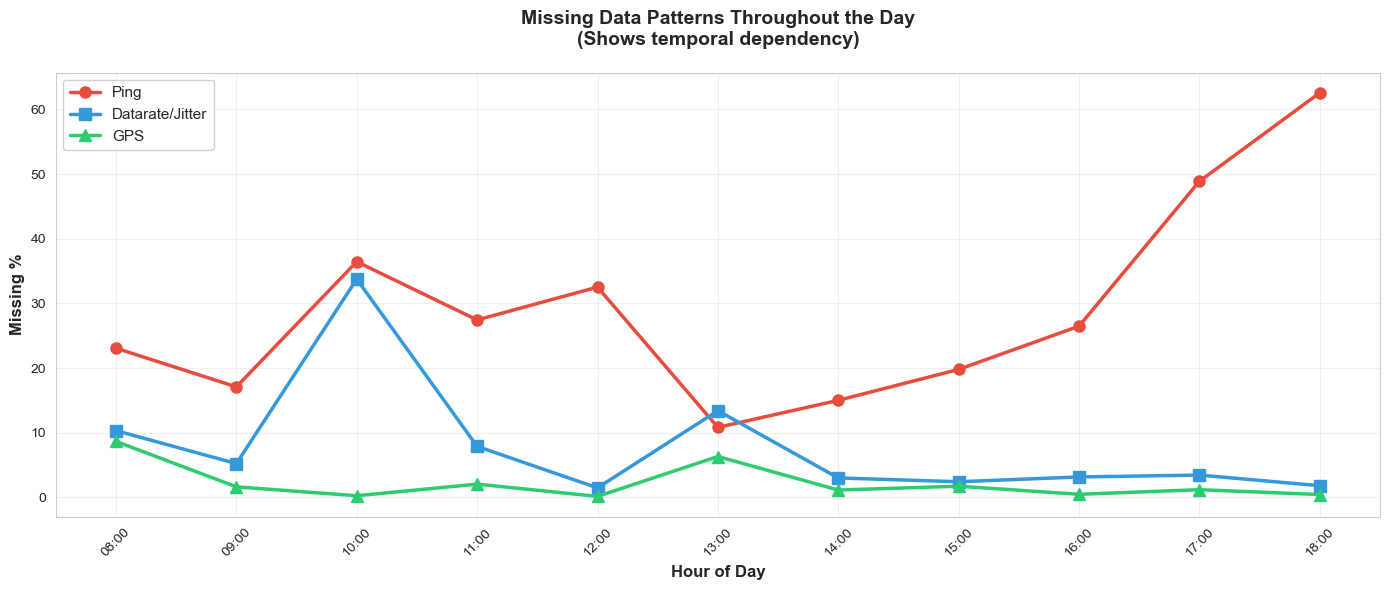


 Creating Figure 2: Device Comparison...
Saved: figures/qos_device_comparison.png


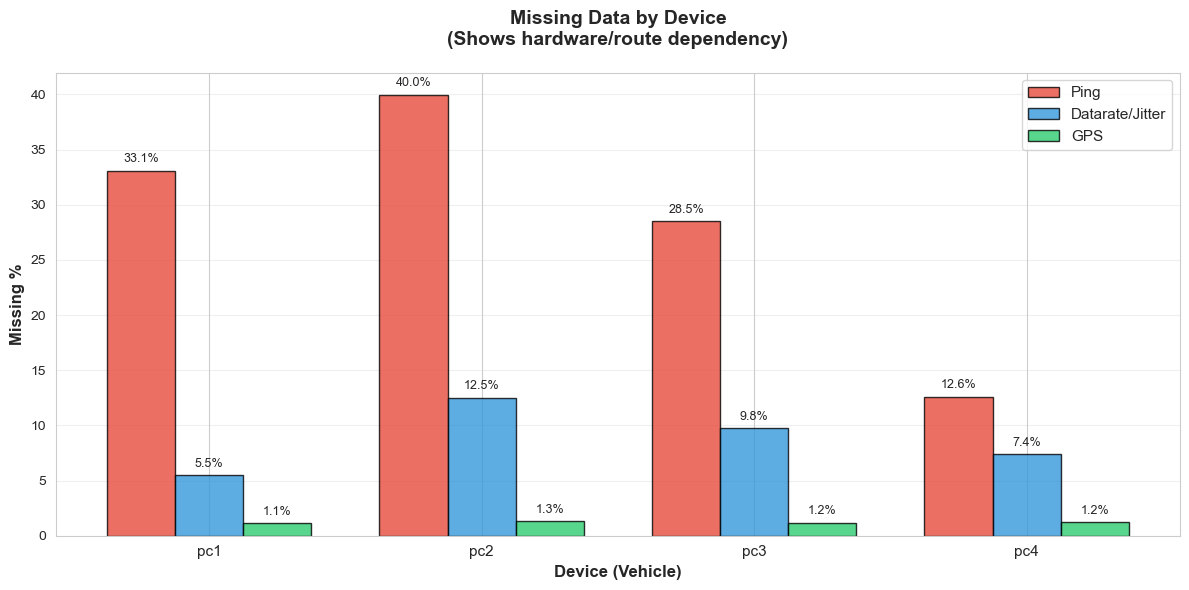


 Creating Figure 3: Missing Pattern Co-occurrence Matrix...
Saved: figures/missing_correlation_matrix.png


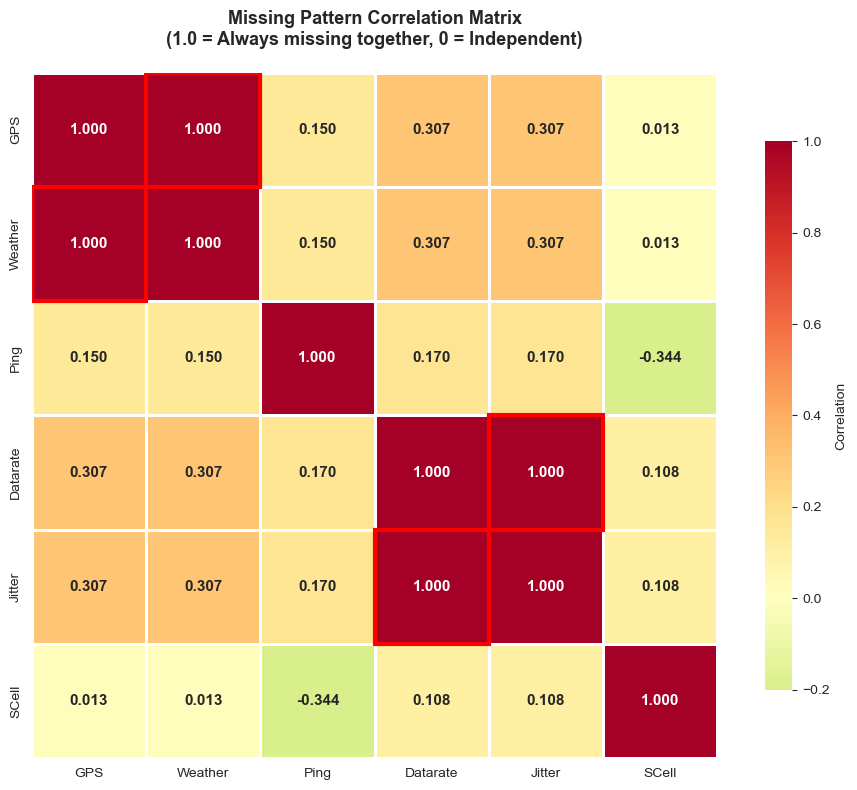

In [34]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# Create GPS missing indicator
gps_cols = ['Latitude', 'Longitude', 'Altitude', 'speed_kmh', 'COG']
gps_all_missing = df[gps_cols].isnull().all(axis=1)

# Create QoS missing indicators
ping_missing = df['ping_ms'].isnull()
datarate_missing = df['datarate'].isnull()
jitter_missing = df['jitter'].isnull()

# FIGURE 1: Temporal Pattern - QoS Missing by Hour

print("\n Creating Figure 1: QoS Missing by Hour...")

hourly_stats = []
for hour in sorted(df['hour'].unique()):
    hour_mask = df['hour'] == hour
    total = hour_mask.sum()
    
    hourly_stats.append({
        'hour': hour,
        'ping_missing_pct': (ping_missing[hour_mask].sum() / total * 100),
        'datarate_missing_pct': (datarate_missing[hour_mask].sum() / total * 100),
        'gps_missing_pct': (gps_all_missing[hour_mask].sum() / total * 100),
        'total_rows': total
    })

hourly_df = pd.DataFrame(hourly_stats)

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(hourly_df['hour'], hourly_df['ping_missing_pct'], 
        marker='o', linewidth=2.5, markersize=8, label='Ping', color='#e74c3c')
ax.plot(hourly_df['hour'], hourly_df['datarate_missing_pct'], 
        marker='s', linewidth=2.5, markersize=8, label='Datarate/Jitter', color='#3498db')
ax.plot(hourly_df['hour'], hourly_df['gps_missing_pct'], 
        marker='^', linewidth=2.5, markersize=8, label='GPS', color='#2ecc71')

ax.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax.set_ylabel('Missing %', fontsize=12, fontweight='bold')
ax.set_title('Missing Data Patterns Throughout the Day\n(Shows temporal dependency)', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='best', framealpha=0.9)
ax.grid(True, alpha=0.3)
ax.set_xticks(hourly_df['hour'])
ax.set_xticklabels([f'{h:02d}:00' for h in hourly_df['hour']], rotation=45)

plt.tight_layout()
plt.savefig('figures/qos_temporal_pattern.png', dpi=300, bbox_inches='tight')
print("Saved: figures/qos_temporal_pattern.png")
plt.show()


# FIGURE 2: Device Comparison - QoS & GPS Missing

print("\n Creating Figure 2: Device Comparison...")

device_stats = []
for device in sorted(df['device'].unique()):
    device_mask = df['device'] == device
    total = device_mask.sum()
    
    device_stats.append({
        'device': device,
        'ping': (ping_missing[device_mask].sum() / total * 100),
        'datarate': (datarate_missing[device_mask].sum() / total * 100),
        'gps': (gps_all_missing[device_mask].sum() / total * 100),
        'total_rows': total
    })

device_df = pd.DataFrame(device_stats)

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(device_df))
width = 0.25

bars1 = ax.bar(x - width, device_df['ping'], width, label='Ping', 
               color='#e74c3c', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x, device_df['datarate'], width, label='Datarate/Jitter', 
               color='#3498db', alpha=0.8, edgecolor='black')
bars3 = ax.bar(x + width, device_df['gps'], width, label='GPS', 
               color='#2ecc71', alpha=0.8, edgecolor='black')

ax.set_xlabel('Device (Vehicle)', fontsize=12, fontweight='bold')
ax.set_ylabel('Missing %', fontsize=12, fontweight='bold')
ax.set_title('Missing Data by Device\n(Shows hardware/route dependency)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(device_df['device'], fontsize=11)
ax.legend(fontsize=11, loc='best')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('figures/qos_device_comparison.png', dpi=300, bbox_inches='tight')
print("Saved: figures/qos_device_comparison.png")
plt.show()


# FIGURE 3: Co-occurrence Matrix (GPS, Weather, QoS, SCell)


print("\n Creating Figure 3: Missing Pattern Co-occurrence Matrix...")

# Create missing indicators
weather_missing = df['temperature'].isnull() if 'temperature' in df.columns else pd.Series(False, index=df.index)
scell_cols = [col for col in df.columns if col.startswith('SCell')]
scell_all_missing = df[scell_cols].isnull().all(axis=1)

missing_indicators = pd.DataFrame({
    'GPS': gps_all_missing.astype(int),
    'Weather': weather_missing.astype(int),
    'Ping': ping_missing.astype(int),
    'Datarate': datarate_missing.astype(int),
    'Jitter': jitter_missing.astype(int),
    'SCell': scell_all_missing.astype(int)
})

# Calculate correlation
corr_matrix = missing_indicators.corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdYlGn_r', 
            center=0, vmin=-0.2, vmax=1,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8, "label": "Correlation"},
            annot_kws={'fontsize': 11, 'fontweight': 'bold'},
            ax=ax)
ax.set_title('Missing Pattern Correlation Matrix\n(1.0 = Always missing together, 0 = Independent)', 
             fontsize=13, fontweight='bold', pad=20)

# Highlight perfect correlations
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        if i != j and corr_matrix.iloc[i, j] > 0.95:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, 
                                      edgecolor='red', lw=3))

plt.tight_layout()
plt.savefig('figures/missing_correlation_matrix.png', dpi=300, bbox_inches='tight')
print("Saved: figures/missing_correlation_matrix.png")
plt.show()


## Pcell vs Scell

In [35]:
pcell_cols = [col for col in df.columns if col.startswith('PCell')]
scell_cols = [col for col in df.columns if col.startswith('SCell')]


print(f"  • PCell features: {len(pcell_cols)}")
print(f"  • SCell features: {len(scell_cols)}")

  • PCell features: 63
  • SCell features: 63


In [36]:
# Create missing indicators for key feature groups
pcell_signal_cols = [col for col in pcell_cols if any(s in col for s in ['RSRP', 'RSRQ', 'RSSI', 'SNR'])]
scell_signal_cols = [col for col in scell_cols if any(s in col for s in ['RSRP', 'RSRQ', 'RSSI', 'SNR'])]

pcell_all_missing = df[pcell_cols].isnull().all(axis=1)
scell_all_missing = df[scell_cols].isnull().all(axis=1)

pcell_signal_missing = df[pcell_signal_cols].isnull().all(axis=1)
scell_signal_missing = df[scell_signal_cols].isnull().all(axis=1)


print(f"{'Category':<35s} {'Missing Count':>15s} {'%':>8s}")
print(f"{'PCell (all features missing)':<35s} {pcell_all_missing.sum():>15,} {pcell_all_missing.sum()/len(df)*100:>7.2f}%")
print(f"{'PCell (signal features missing)':<35s} {pcell_signal_missing.sum():>15,} {pcell_signal_missing.sum()/len(df)*100:>7.2f}%")
print(f"{'SCell (all features missing)':<35s} {scell_all_missing.sum():>15,} {scell_all_missing.sum()/len(df)*100:>7.2f}%")
print(f"{'SCell (signal features missing)':<35s} {scell_signal_missing.sum():>15,} {scell_signal_missing.sum()/len(df)*100:>7.2f}%")

Category                              Missing Count        %
PCell (all features missing)                  9,574    4.62%
PCell (signal features missing)              10,037    4.84%
SCell (all features missing)                174,787   84.26%
SCell (signal features missing)             174,800   84.27%


In [37]:
#scell vs pcell missing comparison

pcell_present = ~pcell_all_missing
scell_present = ~scell_all_missing

In [38]:
relationship_matrix = pd.DataFrame({
    'PCell Present': [
        (pcell_present & scell_present).sum(),
        (pcell_present & scell_all_missing).sum()
    ],
    'PCell Missing': [
        (~pcell_present & scell_present).sum(),
        (~pcell_present & scell_all_missing).sum()
    ]
}, index=['SCell Present', 'SCell Missing'])

In [39]:
relationship_matrix

,PCell Present,PCell Missing
SCell Present,32647,0
SCell Missing,165213,9574


In [40]:

relationship_pct = relationship_matrix / len(df) * 100
print(relationship_pct.round(2))

               PCell Present  PCell Missing
SCell Present          15.74           0.00
SCell Missing          79.65           4.62


In [42]:


# Does SCell only appear when PCell missing?
scell_present_pcell_missing = (~pcell_present & scell_present).sum()
scell_present_pcell_present = (pcell_present & scell_present).sum()

print(f"     SCell present when PCell missing:  {scell_present_pcell_missing:>7,} rows ({scell_present_pcell_missing/len(df)*100:>5.2f}%)")
print(f"     SCell present when PCell present:  {scell_present_pcell_present:>7,} rows ({scell_present_pcell_present/len(df)*100:>5.2f}%)")

if scell_present_pcell_present > scell_present_pcell_missing:

    print(f" SCell REQUIRES PCell ")
else:
    print(f"\n SCell appears more often without PCell!")




     SCell present when PCell missing:        0 rows ( 0.00%)
     SCell present when PCell present:   32,647 rows (15.74%)
 SCell REQUIRES PCell 


In [43]:

# SCell is present, is PCell always present?
scell_present_total = scell_present.sum()
scell_with_pcell = (scell_present & pcell_present).sum()
scell_without_pcell = (scell_present & ~pcell_present).sum()

print(f"     Total SCell present rows:           {scell_present_total:>7,}")
print(f"     SCell WITH PCell:                   {scell_with_pcell:>7,} ({scell_with_pcell/scell_present_total*100:>5.2f}%)")
print(f"     SCell WITHOUT PCell:                {scell_without_pcell:>7,} ({scell_without_pcell/scell_present_total*100:>5.2f}%)")

if scell_with_pcell / scell_present_total > 0.95:
    print(f" Scell requires Primary Cell")
else:
    print(f"\n   Only {scell_with_pcell/scell_present_total*100:.1f}% correlation")


     Total SCell present rows:            32,647
     SCell WITH PCell:                    32,647 (100.00%)
     SCell WITHOUT PCell:                      0 ( 0.00%)
 Scell requires Primary Cell


In [44]:

#  When PCell is present, how often is SCell also present?
pcell_present_total = pcell_present.sum()
pcell_with_scell = (pcell_present & scell_present).sum()
pcell_without_scell = (pcell_present & ~scell_present).sum()


print(f"     Total PCell present rows:           {pcell_present_total:>7,}")
print(f"     PCell WITH SCell:                   {pcell_with_scell:>7,} ({pcell_with_scell/pcell_present_total*100:>5.2f}%)")
print(f"     PCell WITHOUT SCell:                {pcell_without_scell:>7,} ({pcell_without_scell/pcell_present_total*100:>5.2f}%)")


     Total PCell present rows:           197,860
     PCell WITH SCell:                    32,647 (16.50%)
     PCell WITHOUT SCell:                165,213 (83.50%)


In [45]:

#statistical test for association

from scipy.stats import chi2_contingency

# Chi-square test
contingency = pd.crosstab(scell_present, pcell_present)
chi2, p_value, dof, expected = chi2_contingency(contingency)

print(f"\n Chi-square Test:")
print(f"  Null Hypothesis: PCell and SCell presence are INDEPENDENT")
print(f"  Chi-square statistic: {chi2:,.2f}")
print(f"  P-value: {p_value}")
print(f"  Degrees of freedom: {dof}")

if p_value < 0.001:
    print(f"\n  STRONGLY DEPENDENT (p < 0.001)")
    print(f"     SCell and PCell presence are NOT independent")
    print(f"    SCell requires PCell presence")
else:
    print(f"\n  RESULT: Independent (p >= 0.05)")




 Chi-square Test:
  Null Hypothesis: PCell and SCell presence are INDEPENDENT
  Chi-square statistic: 1,873.53
  P-value: 0.0
  Degrees of freedom: 1

  STRONGLY DEPENDENT (p < 0.001)
     SCell and PCell presence are NOT independent
    SCell requires PCell presence


In [46]:
carrier_aggregation_active = pcell_present & scell_present


print(f" Active Rows (with Pcell and SCell present):    {carrier_aggregation_active.sum()} rows ({carrier_aggregation_active.sum()/len(df)*100:>5.2f}%)")
print(f"  Inactive Rows (without Pcell or SCell present):  {(~carrier_aggregation_active).sum()} rows ({(~carrier_aggregation_active).sum()/len(df)*100:>5.2f}%)")

 Active Rows (with Pcell and SCell present):    32647 rows (15.74%)
  Inactive Rows (without Pcell or SCell present):  174787 rows (84.26%)


In [47]:

# By device
print(f"\n DEVICE:")
print(f"{'Device':<10s} {'Total':>10s} {'Active':>15s} {'%':>8s}")

for device in sorted(df['device'].unique()):
    device_mask = df['device'] == device
    total = device_mask.sum()
    ca_active = carrier_aggregation_active[device_mask].sum()
    pct = ca_active / total * 100
    print(f"{device:<10s} {total:>10,} {ca_active:>12,} {pct:>7.2f}%")


 DEVICE:
Device          Total          Active        %
pc1            60,208       16,566   27.51%
pc2            43,458        3,951    9.09%
pc3            60,422        4,538    7.51%
pc4            43,346        7,592   17.51%


## Correlation analysis

In [48]:

# Define feature groups
feature_groups = {
    'GPS': ['Latitude', 'Longitude', 'Altitude', 'speed_kmh'],
    'Weather': ['temperature', 'humidity', 'pressure', 'windSpeed'],
    'Network_QoS': ['ping_ms', 'datarate', 'jitter'],
    'PCell_Signal': ['PCell_RSRP_max', 'PCell_RSRQ_max', 'PCell_RSSI_max', 'PCell_SNR_1'],
    'SCell_Signal': ['SCell_RSRP_max', 'SCell_RSRQ_max', 'SCell_RSSI_max', 'SCell_SNR_1'],
    'PCell_Throughput': ['PCell_Downlink_TB_Size', 'PCell_Uplink_TB_Size'],
    'SCell_Throughput': ['SCell_Downlink_TB_Size', 'SCell_Uplink_TB_Size']
}


# Collect all features that exist in dataset
selected_features = []
for group, features in feature_groups.items():
    for feat in features:
        if feat in df.columns:
            selected_features.append(feat)

print(f"Selected {len(selected_features)} features for correlation analysis")

Selected 23 features for correlation analysis


In [49]:
df_corr = df[selected_features].copy()


 Creating: Complete Correlation Matrix
Saved: figures/correlation_matrix_complete.png


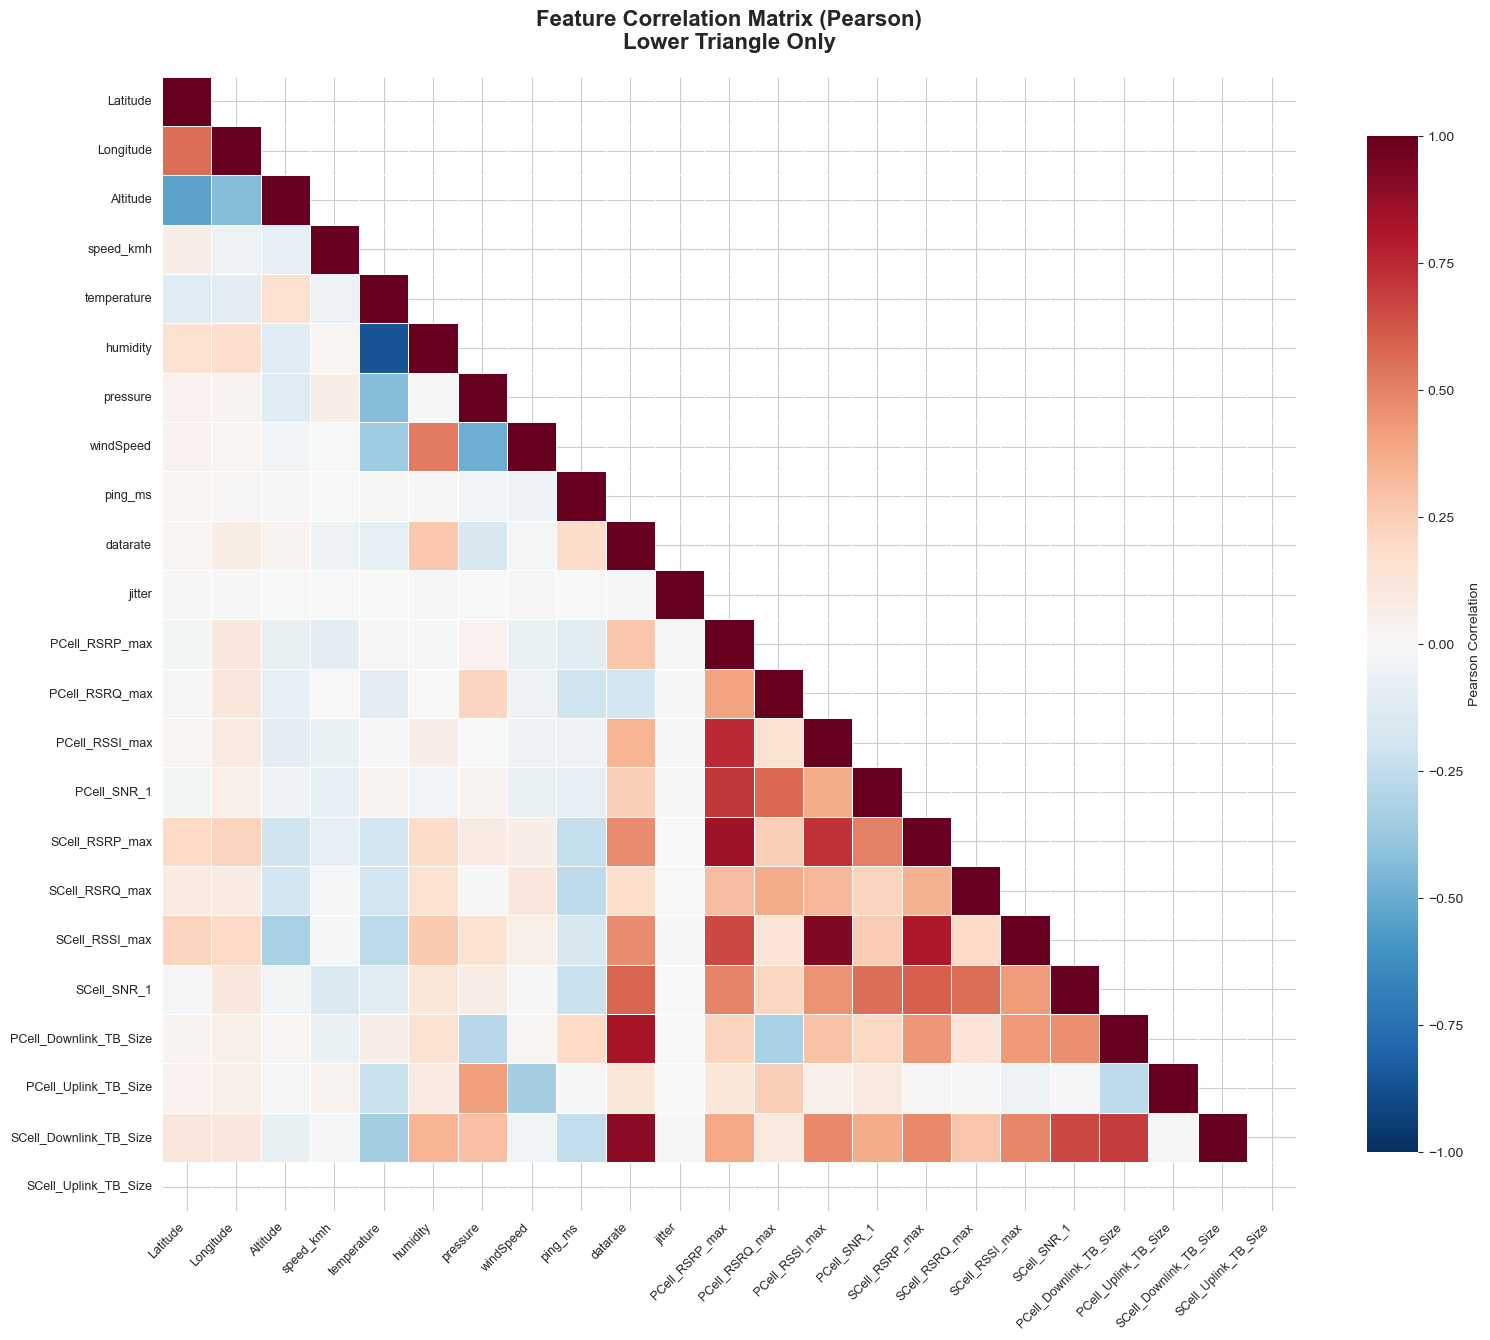

In [50]:
print("\n Creating: Complete Correlation Matrix")

# Calculate correlation (pairwise complete observations)
corr_matrix = df_corr.corr(method='pearson')

fig, ax = plt.subplots(figsize=(16, 14))

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Plot heatmap
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='RdBu_r', 
            center=0, vmin=-1, vmax=1,
            square=True, linewidths=0.5, 
            cbar_kws={"shrink": 0.8, "label": "Pearson Correlation"},
            ax=ax)

ax.set_title('Feature Correlation Matrix (Pearson)\nLower Triangle Only', 
             fontsize=16, fontweight='bold', pad=20)

# Rotate labels
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)

plt.tight_layout()
plt.savefig('figures/correlation_matrix_complete.png', dpi=300, bbox_inches='tight')
print("Saved: figures/correlation_matrix_complete.png")
plt.show()


 Creating: High Correlation Pairs

 Found 10 feature pairs with |r| > 0.7
Saved: figures/high_correlation_pairs.png


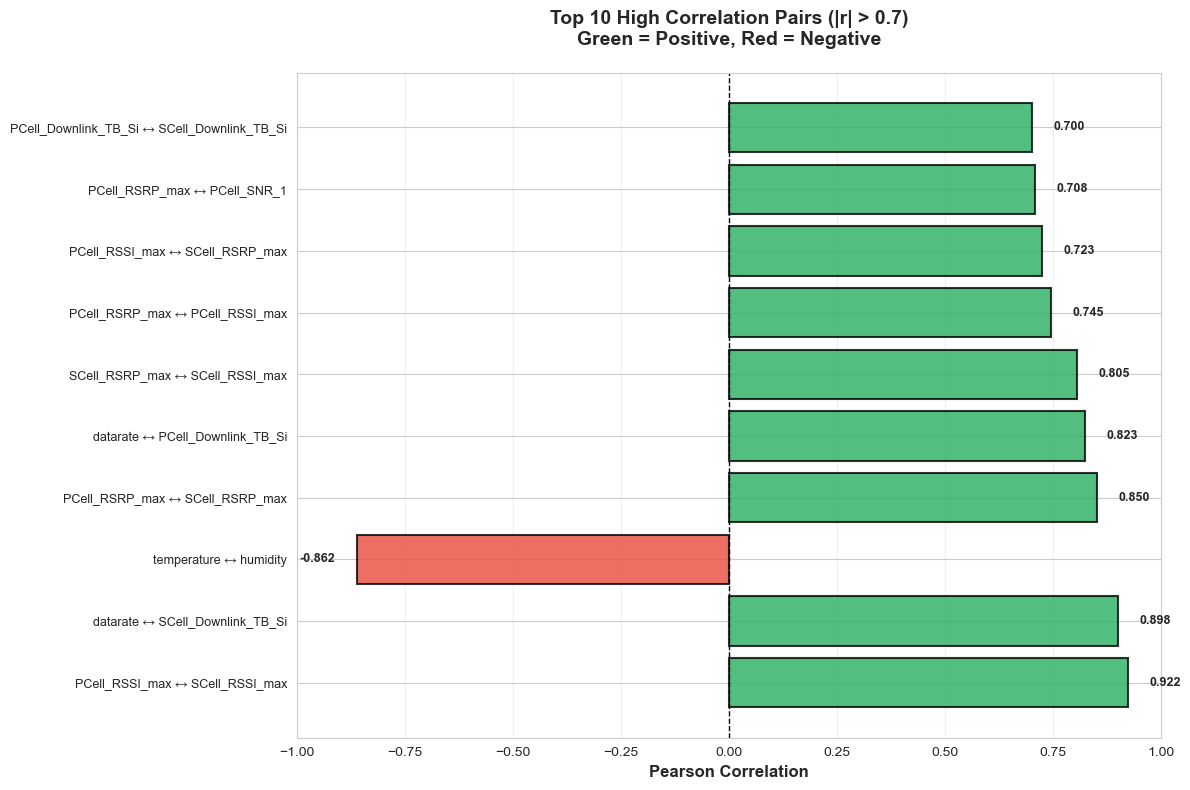


 TOP 10 HIGH CORRELATION PAIRS:
             Feature_1              Feature_2  Correlation
        PCell_RSSI_max         SCell_RSSI_max     0.922217
              datarate SCell_Downlink_TB_Size     0.898411
           temperature               humidity    -0.861554
        PCell_RSRP_max         SCell_RSRP_max     0.850216
              datarate PCell_Downlink_TB_Size     0.823061
        SCell_RSRP_max         SCell_RSSI_max     0.805334
        PCell_RSRP_max         PCell_RSSI_max     0.744778
        PCell_RSSI_max         SCell_RSRP_max     0.723316
        PCell_RSRP_max            PCell_SNR_1     0.707849
PCell_Downlink_TB_Size SCell_Downlink_TB_Size     0.700290


In [51]:
print("\n Creating: High Correlation Pairs")

# Find high correlations
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7 and not np.isnan(corr_val):
            high_corr_pairs.append({
                'Feature_1': corr_matrix.columns[i],
                'Feature_2': corr_matrix.columns[j],
                'Correlation': corr_val
            })

high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)

print(f"\n Found {len(high_corr_df)} feature pairs with |r| > 0.7")

if len(high_corr_df) > 0:
    # Plot top 20 high correlations
    top_n = min(20, len(high_corr_df))
    plot_df = high_corr_df.head(top_n).copy()
    plot_df['Pair'] = plot_df['Feature_1'].str[:20] + ' ↔ ' + plot_df['Feature_2'].str[:20]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    colors = ['#27ae60' if x > 0 else '#e74c3c' for x in plot_df['Correlation']]
    bars = ax.barh(range(len(plot_df)), plot_df['Correlation'], 
                   color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    ax.set_yticks(range(len(plot_df)))
    ax.set_yticklabels(plot_df['Pair'], fontsize=9)
    ax.set_xlabel('Pearson Correlation', fontsize=12, fontweight='bold')
    ax.set_title(f'Top {top_n} High Correlation Pairs (|r| > 0.7)\nGreen = Positive, Red = Negative', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.axvline(x=0, color='black', linewidth=1, linestyle='--')
    ax.set_xlim(-1, 1)
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, plot_df['Correlation'])):
        x_pos = val + (0.05 if val > 0 else -0.05)
        ax.text(x_pos, bar.get_y() + bar.get_height()/2, 
               f'{val:.3f}', ha='left' if val > 0 else 'right', va='center',
               fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('figures/high_correlation_pairs.png', dpi=300, bbox_inches='tight')
    print("Saved: figures/high_correlation_pairs.png")
    plt.show()
    
    # Print table
    print(f"\n TOP 10 HIGH CORRELATION PAIRS:")
    print(high_corr_df.head(10).to_string(index=False))


 Feature Group Correlation Matrix.
Saved: figures/feature_group_correlation.png


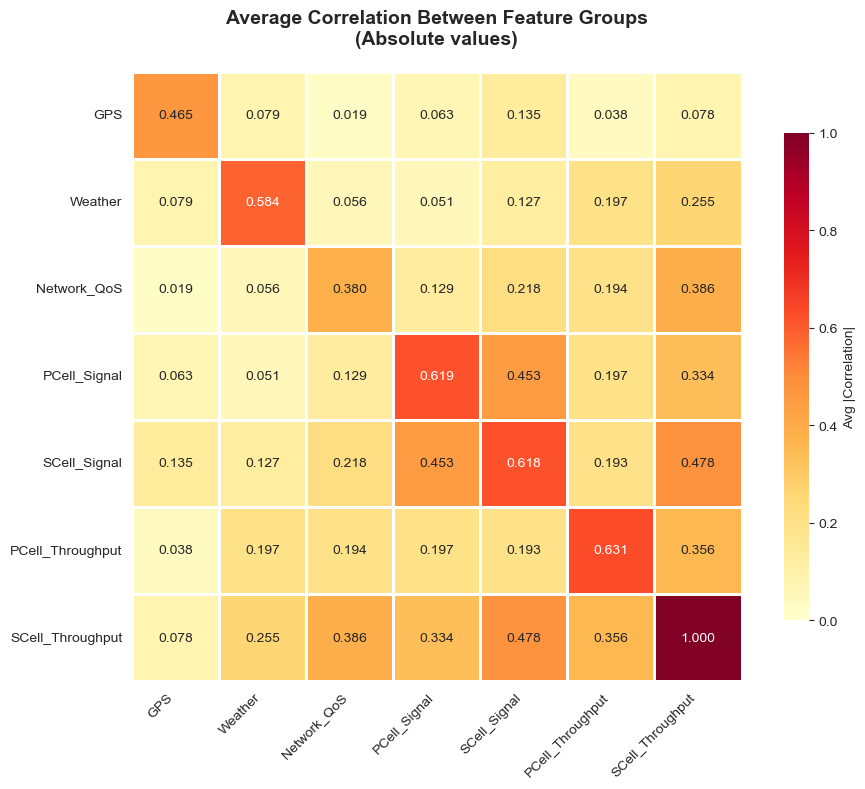

In [52]:

print("\n Feature Group Correlation Matrix.")

# Calculate average correlation between feature groups
group_corr_matrix = pd.DataFrame(index=feature_groups.keys(), columns=feature_groups.keys())

for group1_name, group1_features in feature_groups.items():
    for group2_name, group2_features in feature_groups.items():
        # Get features that exist
        g1_feats = [f for f in group1_features if f in df_corr.columns]
        g2_feats = [f for f in group2_features if f in df_corr.columns]
        
        if len(g1_feats) > 0 and len(g2_feats) > 0:
            # Calculate average correlation
            corr_subset = corr_matrix.loc[g1_feats, g2_feats]
            avg_corr = corr_subset.abs().mean().mean()  # Average absolute correlation
            group_corr_matrix.loc[group1_name, group2_name] = avg_corr
        else:
            group_corr_matrix.loc[group1_name, group2_name] = np.nan

group_corr_matrix = group_corr_matrix.astype(float)

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(group_corr_matrix, annot=True, fmt='.3f', cmap='YlOrRd', 
            square=True, linewidths=2, 
            cbar_kws={"shrink": 0.8, "label": "Avg |Correlation|"},
            vmin=0, vmax=1, ax=ax)

ax.set_title('Average Correlation Between Feature Groups\n(Absolute values)', 
             fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('figures/feature_group_correlation.png', dpi=300, bbox_inches='tight')
print("Saved: figures/feature_group_correlation.png")
plt.show()


In [54]:

numeric_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nTotal numeric features: {len(numeric_cols_all)}")
print(f"  Total rows: {len(df):,}")
print(f"  Dataset shape: {df.shape}")


Total numeric features: 148
  Total rows: 207,434
  Dataset shape: (207434, 162)


In [55]:


print(f"\n calculate correlations for {len(numeric_cols_all)} × {len(numeric_cols_all)} pairs")
print(f"Total pairs: {len(numeric_cols_all) * (len(numeric_cols_all) - 1) // 2:,}")
print("\nNote: Using pairwise complete observations (ignoring NaN)")

# Calculate correlation matrix
print("\nCalculating... (this may take a moment)")
corr_matrix_full = df[numeric_cols_all].corr(method='pearson')

print(f"Correlation matrix calculated: {corr_matrix_full.shape}")


 calculate correlations for 148 × 148 pairs
Total pairs: 10,878

Note: Using pairwise complete observations (ignoring NaN)

Calculating... (this may take a moment)
Correlation matrix calculated: (148, 148)


In [56]:

# Find all correlation pairs above threshold
thresholds = [0.95, 0.90, 0.80, 0.70]

for threshold in thresholds:
    high_corr_pairs = []
    
    for i in range(len(corr_matrix_full.columns)):
        for j in range(i+1, len(corr_matrix_full.columns)):
            corr_val = corr_matrix_full.iloc[i, j]
            if abs(corr_val) >= threshold and not np.isnan(corr_val):
                high_corr_pairs.append({
                    'Feature_1': corr_matrix_full.columns[i],
                    'Feature_2': corr_matrix_full.columns[j],
                    'Correlation': corr_val,
                    'Abs_Correlation': abs(corr_val)
                })
    
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Abs_Correlation', ascending=False)
    
    print(f"\n Pairs with |r| ≥ {threshold}: {len(high_corr_df)}")
    
    if len(high_corr_df) > 0 and threshold >= 0.90:
        print(f"\nTop 10 pairs:")
        print(high_corr_df.head(10)[['Feature_1', 'Feature_2', 'Correlation']].to_string(index=False))

# Store the 0.7 threshold results for visualization
high_corr_pairs_all = []
for i in range(len(corr_matrix_full.columns)):
    for j in range(i+1, len(corr_matrix_full.columns)):
        corr_val = corr_matrix_full.iloc[i, j]
        if abs(corr_val) >= 0.7 and not np.isnan(corr_val):
            high_corr_pairs_all.append({
                'Feature_1': corr_matrix_full.columns[i],
                'Feature_2': corr_matrix_full.columns[j],
                'Correlation': corr_val,
                'Abs_Correlation': abs(corr_val)
            })

high_corr_all_df = pd.DataFrame(high_corr_pairs_all).sort_values('Abs_Correlation', ascending=False)


 Pairs with |r| ≥ 0.95: 42

Top 10 pairs:
                Feature_1                 Feature_2  Correlation
 PCell_Downlink_frequency    PCell_Uplink_frequency          1.0
              temperature       apparentTemperature          1.0
 SCell_Downlink_RBs_MCS_0 SCell_Downlink_RBs_MCS_17          1.0
 SCell_Downlink_RBs_MCS_2 SCell_Downlink_RBs_MCS_17          1.0
SCell_Downlink_RBs_MCS_10 SCell_Downlink_RBs_MCS_17          1.0
SCell_Downlink_RBs_MCS_17 SCell_Downlink_RBs_MCS_27          1.0
             PCell_RSSI_2            PCell_RSSI_max          1.0
SCell_Downlink_RBs_MCS_17 SCell_Downlink_RBs_MCS_28          1.0
             SCell_RSSI_2            SCell_RSSI_max          1.0
 SCell_Downlink_frequency    SCell_Uplink_frequency          1.0

 Pairs with |r| ≥ 0.9: 57

Top 10 pairs:
                Feature_1                 Feature_2  Correlation
 PCell_Downlink_frequency    PCell_Uplink_frequency          1.0
              temperature       apparentTemperature          1.0
SCell

Saved: figures/high_correlation_pairs_all.png


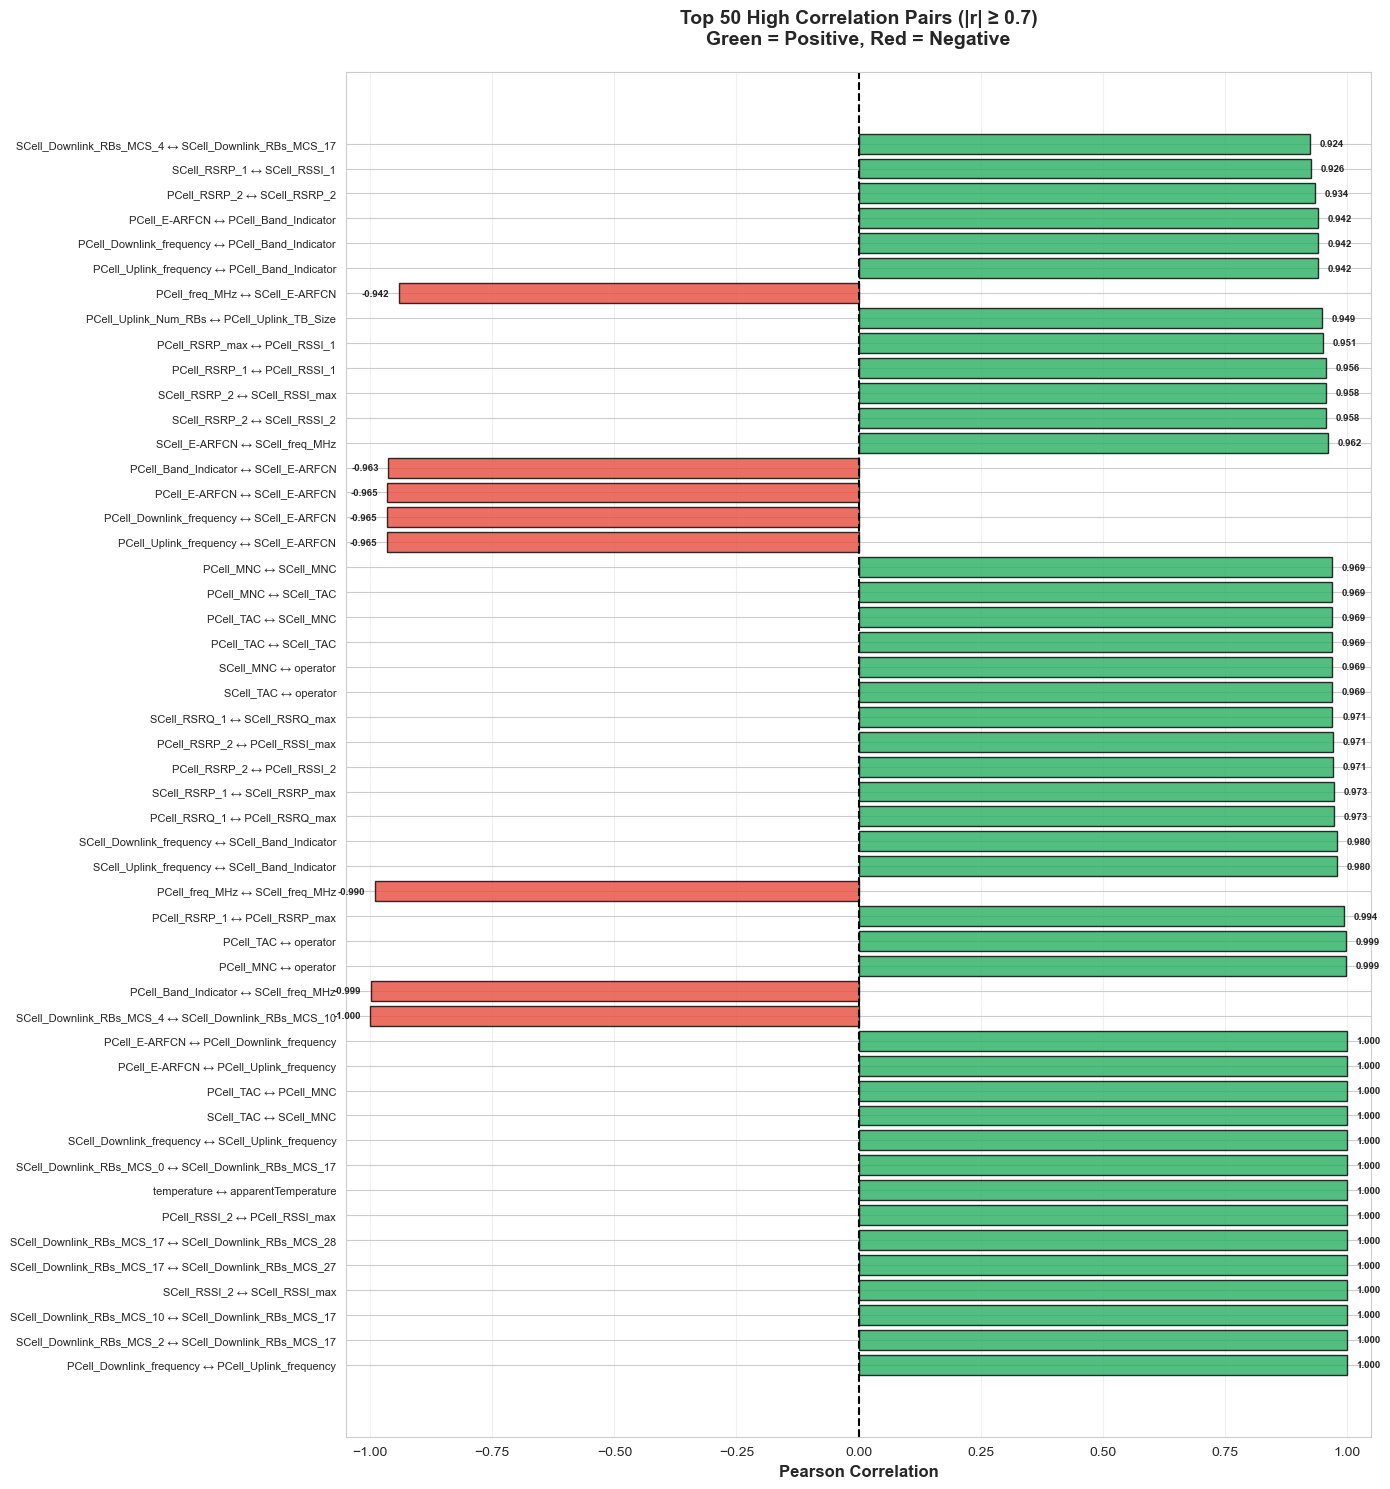

In [57]:


if len(high_corr_all_df) > 0:
    top_n = min(50, len(high_corr_all_df))
    plot_df = high_corr_all_df.head(top_n).copy()
    
    # Create readable labels
    plot_df['Pair'] = plot_df.apply(
        lambda x: f"{x['Feature_1'][:25]} ↔ {x['Feature_2'][:25]}", axis=1
    )
    
    fig, ax = plt.subplots(figsize=(14, max(12, top_n * 0.3)))
    
    colors = ['#27ae60' if x > 0 else '#e74c3c' for x in plot_df['Correlation']]
    bars = ax.barh(range(len(plot_df)), plot_df['Correlation'], 
                   color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    
    ax.set_yticks(range(len(plot_df)))
    ax.set_yticklabels(plot_df['Pair'], fontsize=8)
    ax.set_xlabel('Pearson Correlation', fontsize=12, fontweight='bold')
    ax.set_title(f'Top {top_n} High Correlation Pairs (|r| ≥ 0.7)\nGreen = Positive, Red = Negative', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.axvline(x=0, color='black', linewidth=1.5, linestyle='--')
    ax.set_xlim(-1.05, 1.05)
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, plot_df['Correlation'])):
        x_pos = val + (0.02 if val > 0 else -0.02)
        ax.text(x_pos, bar.get_y() + bar.get_height()/2, 
               f'{val:.3f}', ha='left' if val > 0 else 'right', va='center',
               fontsize=7, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('figures/high_correlation_pairs_all.png', dpi=300, bbox_inches='tight')
    print(f"Saved: figures/high_correlation_pairs_all.png")
    plt.show()

In [58]:


# Define feature categories
feature_categories = {
    'GPS': [c for c in numeric_cols_all if any(k in c.lower() for k in ['lat', 'lon', 'alt', 'speed', 'cog'])],
    'Weather': [c for c in numeric_cols_all if any(k in c.lower() for k in ['temp', 'humid', 'precip', 'wind', 'pressure', 'cloud'])],
    'Traffic': [c for c in numeric_cols_all if 'traffic' in c.lower()],
    'Network_QoS': [c for c in numeric_cols_all if c in ['ping_ms', 'datarate', 'jitter']],
    'PCell_Signal': [c for c in numeric_cols_all if c.startswith('PCell') and any(s in c for s in ['RSRP', 'RSRQ', 'RSSI', 'SNR'])],
    'PCell_Downlink': [c for c in numeric_cols_all if c.startswith('PCell') and 'Downlink' in c],
    'PCell_Uplink': [c for c in numeric_cols_all if c.startswith('PCell') and 'Uplink' in c],
    'PCell_Network': [c for c in numeric_cols_all if c.startswith('PCell') and any(s in c for s in ['Cell_ID', 'TAC', 'Band', 'MNC', 'freq', 'ARFCN'])],
    'SCell_Signal': [c for c in numeric_cols_all if c.startswith('SCell') and any(s in c for s in ['RSRP', 'RSRQ', 'RSSI', 'SNR'])],
    'SCell_Downlink': [c for c in numeric_cols_all if c.startswith('SCell') and 'Downlink' in c],
    'SCell_Uplink': [c for c in numeric_cols_all if c.startswith('SCell') and 'Uplink' in c],
    'SCell_Network': [c for c in numeric_cols_all if c.startswith('SCell') and any(s in c for s in ['Cell_ID', 'TAC', 'Band', 'MNC', 'freq', 'ARFCN'])],
    'Temporal': [c for c in numeric_cols_all if c in ['hour', 'day_of_week']],
}

In [59]:

# Calculate within-group and between-group correlations
print(f"\n WITHIN-GROUP AVERAGE CORRELATIONS:")
print(f"{'Category':<20s} {'Features':>10s} {'Avg |r|':>10s} {'Max |r|':>10s}")

for cat_name, cat_features in feature_categories.items():
    if len(cat_features) > 1:
        # Get subset correlation matrix
        cat_corr = corr_matrix_full.loc[cat_features, cat_features]
        
        # Get upper triangle (excluding diagonal)
        upper_tri = cat_corr.where(np.triu(np.ones(cat_corr.shape), k=1).astype(bool))
        correlations = upper_tri.stack().dropna()
        
        if len(correlations) > 0:
            avg_corr = correlations.abs().mean()
            max_corr = correlations.abs().max()
            print(f"{cat_name:<20s} {len(cat_features):>10d} {avg_corr:>10.3f} {max_corr:>10.3f}")


 WITHIN-GROUP AVERAGE CORRELATIONS:
Category               Features    Avg |r|    Max |r|
GPS                           6      0.170      0.558
Weather                       8      0.471      1.000
Traffic                       2      0.081      0.081
Network_QoS                   3      0.070      0.194
PCell_Signal                 11      0.599      1.000
PCell_Downlink               36      0.204      0.836
PCell_Uplink                  4      0.271      0.949
PCell_Network                 9      0.376      1.000
SCell_Signal                 11      0.582      1.000
SCell_Downlink               36      0.185      1.000
SCell_Network                 9      0.388      1.000


Saved: figures/category_correlation_matrix_all.png


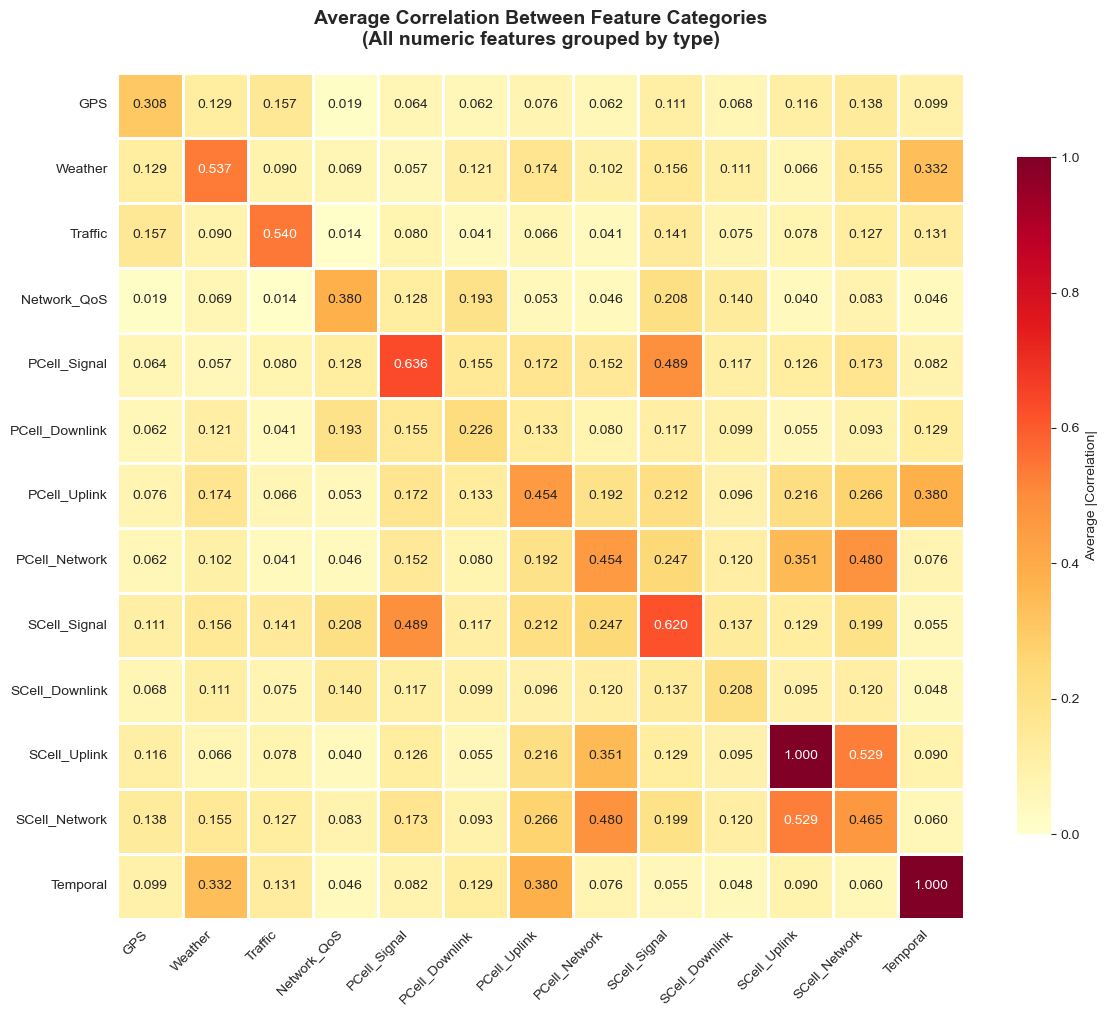

In [60]:

# Calculate average correlations between categories
categories_with_data = {k: v for k, v in feature_categories.items() if len(v) > 0}
cat_names = list(categories_with_data.keys())

group_corr_matrix = pd.DataFrame(index=cat_names, columns=cat_names, dtype=float)

for cat1_name in cat_names:
    for cat2_name in cat_names:
        cat1_features = categories_with_data[cat1_name]
        cat2_features = categories_with_data[cat2_name]
        
        # Calculate average absolute correlation
        cat_corr = corr_matrix_full.loc[cat1_features, cat2_features]
        avg_corr = cat_corr.abs().mean().mean()
        group_corr_matrix.loc[cat1_name, cat2_name] = avg_corr

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(group_corr_matrix, annot=True, fmt='.3f', cmap='YlOrRd', 
            square=True, linewidths=2, 
            cbar_kws={"shrink": 0.8, "label": "Average |Correlation|"},
            vmin=0, vmax=1, ax=ax)

ax.set_title('Average Correlation Between Feature Categories\n(All numeric features grouped by type)', 
             fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.savefig('figures/category_correlation_matrix_all.png', dpi=300, bbox_inches='tight')
print("Saved: figures/category_correlation_matrix_all.png")
plt.show()

In [61]:
# Save full correlation matrix
corr_matrix_full.to_csv('results/correlation_matrix_full.csv')
print("Saved: results/correlation_matrix_full.csv")

# Save high correlation pairs
if len(high_corr_all_df) > 0:
    high_corr_all_df.to_csv('results/high_correlation_pairs.csv', index=False)
    print(f"Saved: results/high_correlation_pairs.csv ({len(high_corr_all_df)} pairs)")

Saved: results/correlation_matrix_full.csv
Saved: results/high_correlation_pairs.csv (154 pairs)


Saved: figures/correlation_heatmap_top40.png


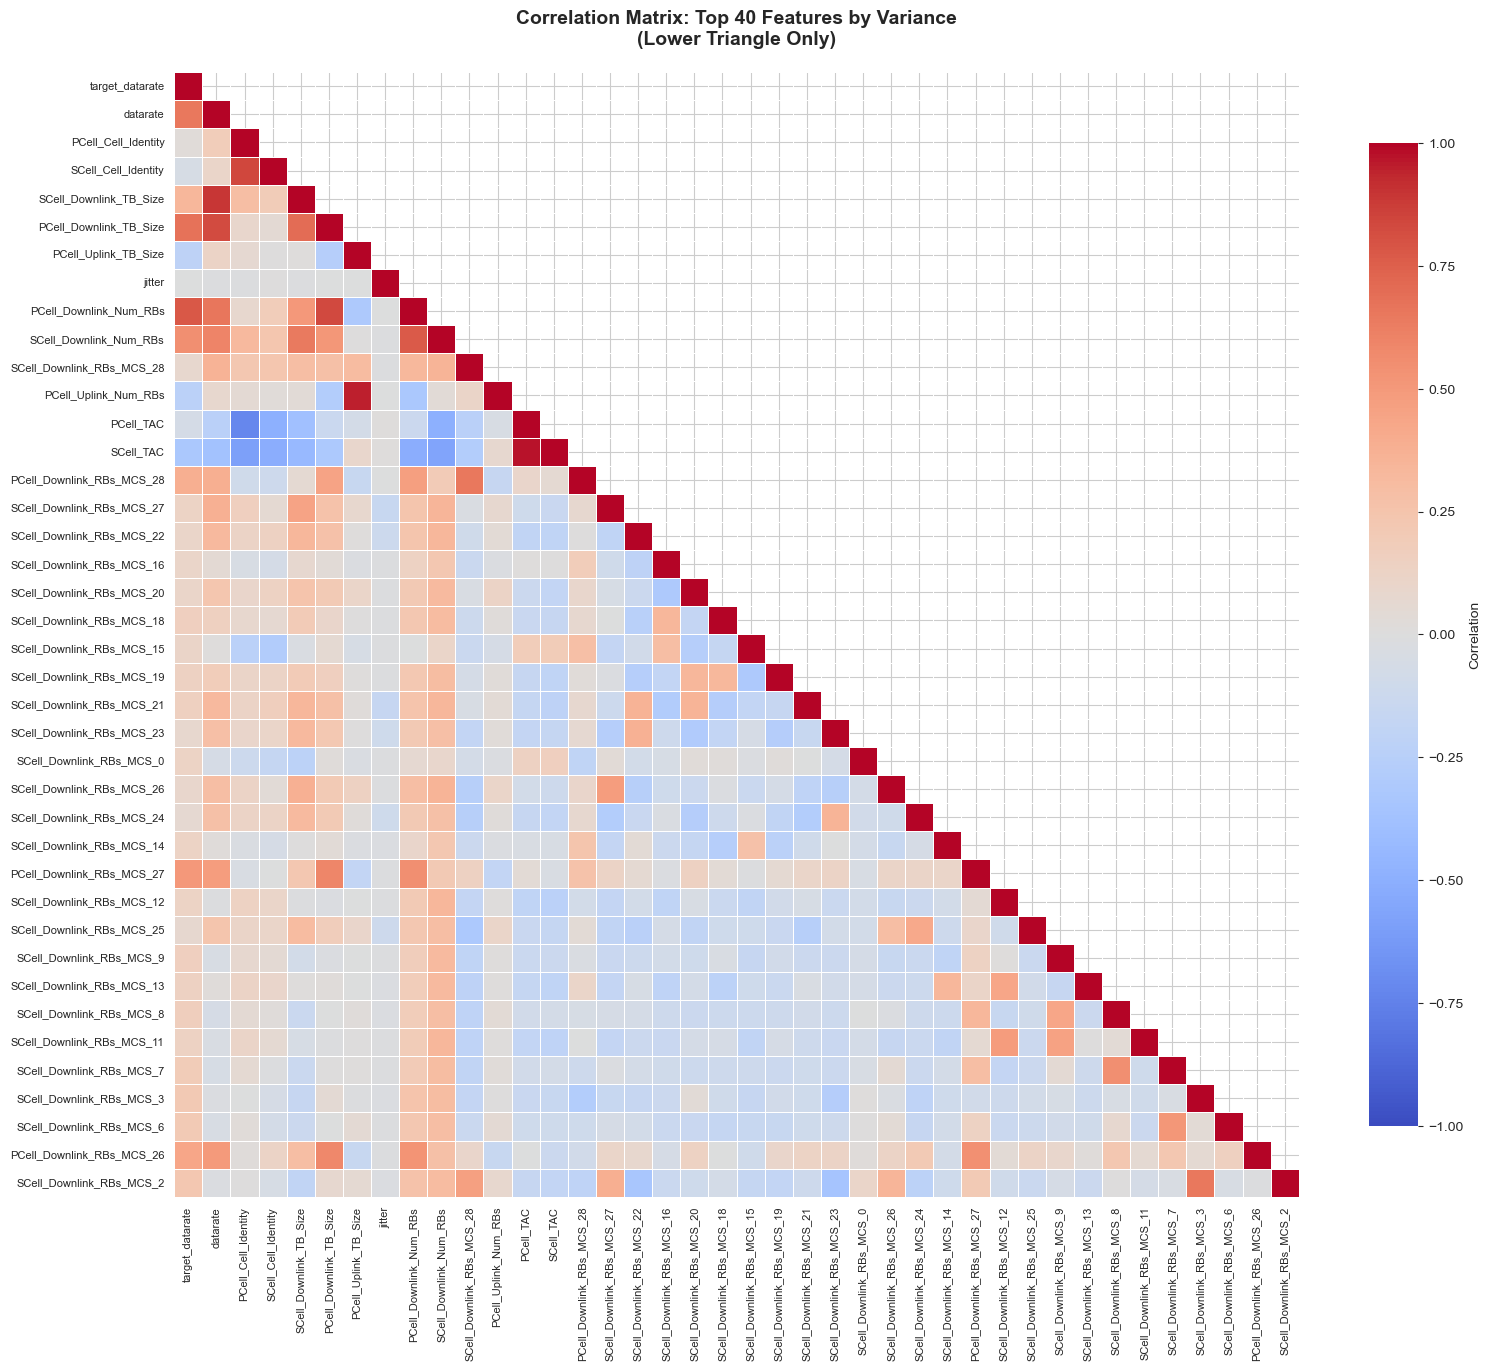

In [62]:
numeric_with_data = [col for col in numeric_cols if df[col].notna().sum() > 100]
# Select top 40 features by variance for visualization
variances = df[numeric_with_data].var().sort_values(ascending=False)
top_variance_features = variances.head(40).index.tolist()

# Compute correlation for these features
corr_subset = df[top_variance_features].corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_subset, dtype=bool), k=1)  # Mask upper triangle

sns.heatmap(corr_subset, mask=mask, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, 
            cbar_kws={"shrink": 0.8, "label": "Correlation"},
            vmin=-1, vmax=1, ax=ax,
            annot=False)  # Set to True if you want correlation values

ax.set_title('Correlation Matrix: Top 40 Features by Variance\n(Lower Triangle Only)', 
             fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.savefig('figures/correlation_heatmap_top40.png', dpi=300, bbox_inches='tight')
print("Saved: figures/correlation_heatmap_top40.png")
plt.show()